# Solution Chemistry data cleaning and wrangling

In [1]:
import numpy as np
import pandas as pd 
from plotnine import *
import math

In [3]:
# Reading data sets and initial data wrangling
solutionChem = pd.read_csv('./input/slice_experiments_solution_chemistry.csv', skiprows  =1)
solutionChem = solutionChem.rename(columns = {'Cu':'Cu_mM', 'Fe':'Fe_mM', 'S':'S_mM', 'Zn':'Zn_mM', 'Si':'Si_mM'})
solutionParam = pd.read_csv('./input/slice_experiments_parameters.csv', skiprows  =1)
solutionParam = solutionParam.drop(columns = ['v_drop_res','Ref Elec_mV'])

#calculates time elapsed from date_time for solution Chemistry df
solutionChem['Time_elapsed_d'] = solutionChem['Date_time'] - solutionChem.groupby(['Experiment','Experiment_type'])['Date_time'].transform('min')

#BHPC24S1 => I labelled all samples (source and target) with the same label... LT... This change Sources to LS
solutionChem['Sample_ID'] = np.where( (solutionChem['Experiment']=='BHPC24S1') & (solutionChem['Reservoir']=='Source'), solutionChem['Sample_ID'].str.replace("LT", "LS"), solutionChem['Sample_ID'])


# ORP to SHE corrections (added column)
Eref = 206.
solutionParam['Eh_mV_Target'] = solutionParam['ORP_mV_Target'] + Eref
solutionParam['Eh_mV_Source'] = solutionParam['ORP_mV_Source'] + Eref



In [4]:
solutionChem.head()

,Experiment,Date_time,Sample_ID,Reservoir,Experiment_type,Iodide_HPLC_mM,Cu_mM,Fe_mM,S_mM,Zn_mM,Si_mM,Mo,Time_elapsed_d
0,BHPC24S1,44214.69097,BHPC24S1_00T,Source,Conservative,1.036517,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
1,BHPC24S1,44214.69097,BHPC24S1_00T,Target,Conservative,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
2,BHPC24S1,44215.37500,BHPC24S1_01T,Target,Conservative,0.011120,NaN,NaN,NaN,NaN,NaN,NaN,0.68403
3,BHPC24S1,44215.70833,BHPC24S1_02T,Target,Conservative,0.016755,NaN,NaN,NaN,NaN,NaN,NaN,1.01736
4,BHPC24S1,44215.95833,BHPC24S1_03T,Target,Conservative,0.020879,NaN,NaN,NaN,NaN,NaN,NaN,1.26736


In [5]:
solutionParam.head()

,Experiment,Date_time,Sample_ID,Experiment_type,Time_elapsed_d,pH_Target,pH_Source,ORP_mV_Target,ORP_mV_Source,EC_mS_cm-1_Target,pH_Anode,pH_Cathode,Voltage_gradient_V_Electrical,Current_mA_Electrical,Iodide_ISE_mV_Target,Iodide_ISE_uM_Target,Eh_mV_Target,Eh_mV_Source
0,BHPC24S1,44214.71319,Parameter,Conservative,0.000000,9.839,4.856,NaN,NaN,12560.0,8.032,8.057,53.5,103.829787,-43.266667,3.692167,NaN,NaN
1,BHPC24S1,44215.38056,Parameter,Conservative,0.689583,11.455,3.164,NaN,NaN,12580.0,8.103,9.118,43.3,128.297872,-53.633333,5.629490,NaN,NaN
2,BHPC24S1,44215.68819,Parameter,Conservative,0.997222,11.464,3.829,NaN,NaN,12620.0,8.025,8.090,43.2,127.021277,-69.966667,10.941903,NaN,NaN
3,BHPC24S1,44215.94306,Parameter,Conservative,1.252083,10.739,3.218,NaN,NaN,12500.0,8.032,8.097,43.2,125.744681,-72.866667,12.312275,NaN,NaN
4,BHPC24S1,44216.40486,Parameter,Conservative,1.713889,10.773,3.090,NaN,NaN,12640.0,8.044,8.114,44.6,122.765957,-73.733333,12.754195,NaN,NaN


In [6]:
# martens['Experiment'] = 'Martens2021'
# martens['Cu_mM'] = martens['Cu_mM'].astype('object')
# martens['Fe_mM'] = martens['Fe_mM'].astype('object')
# martens.head()


In [7]:
solutionData =pd.merge(solutionChem, solutionParam, how='outer')
solutionData = solutionData.drop(columns = 'Date_time')
# solutionData = pd.merge(solutionData, martens, how='outer')
solutionData.to_csv('./output/solutionData.csv')
solutionData

,Experiment,Sample_ID,Reservoir,Experiment_type,Iodide_HPLC_mM,Cu_mM,Fe_mM,S_mM,Zn_mM,Si_mM,...,ORP_mV_Source,EC_mS_cm-1_Target,pH_Anode,pH_Cathode,Voltage_gradient_V_Electrical,Current_mA_Electrical,Iodide_ISE_mV_Target,Iodide_ISE_uM_Target,Eh_mV_Target,Eh_mV_Source
0,BHPC24S1,BHPC24S1_00T,Source,Conservative,1.036517,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BHPC24S1,BHPC24S1_00T,Target,Conservative,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BHPC24S1,BHPC24S1_01T,Target,Conservative,0.011120,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BHPC24S1,BHPC24S1_02T,Target,Conservative,0.016755,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BHPC24S1,BHPC24S1_03T,Target,Conservative,0.020879,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,BHPC27S5,Parameter,NaN,Leaching,NaN,NaN,NaN,NaN,NaN,NaN,...,401.3,25620.0,7.658,7.673,68.4,195.6,NaN,NaN,824.9,607.3
336,BHPC27S6,Parameter,NaN,Leaching,NaN,NaN,NaN,NaN,NaN,NaN,...,650.4,9968.0,6.872,6.882,129.5,132.9,NaN,NaN,704.3,856.4
337,BHPC27S6,Parameter,NaN,Leaching,NaN,NaN,NaN,NaN,NaN,NaN,...,500.9,15630.0,7.523,7.491,65.9,324.8,NaN,NaN,711.8,706.9
338,BHPC27S6,Parameter,NaN,Leaching,NaN,NaN,NaN,NaN,NaN,NaN,...,463.4,21010.0,7.607,7.606,75.6,306.3,NaN,NaN,796.9,669.4


In [8]:
# Several data cleaning and category standardization
solutionDataMelted = pd.melt(solutionData, id_vars =['Experiment', 'Reservoir','Time_elapsed_d','Sample_ID','Experiment_type'])
solutionDataMelted['BDL'] = np.where(solutionDataMelted['value']=='BDL', 'BDL', 'No')
solutionDataMelted['value'] = np.where(solutionDataMelted['value']=='BDL', '', solutionDataMelted['value'])
solutionDataMelted['value'] = pd.to_numeric(solutionDataMelted.value)
solutionDataMelted['Reservoir'] = solutionDataMelted['Reservoir'].fillna(0)
solutionDataMelted['Reservoir'] = np.where(solutionDataMelted['Reservoir']==0, solutionDataMelted['variable'].str.rsplit('_',1).str[1], solutionDataMelted['Reservoir'])
solutionDataMelted['variable'] = solutionDataMelted['variable'].str.replace('_Target','')
solutionDataMelted['variable'] = solutionDataMelted['variable'].str.replace('_Source','')
solutionDataMelted['category'] = np.where(solutionDataMelted['Sample_ID']=='Parameter', 'Parameter', 'Analysis')
solutionDataMelted['variable'] = solutionDataMelted['variable'].str.replace('_Anode','')
solutionDataMelted['variable'] = solutionDataMelted['variable'].str.replace('_Cathode','')
solutionDataMelted['variable'] = solutionDataMelted['variable'].str.replace('_mM','')
solutionDataMelted['variable'] = solutionDataMelted['variable'].str.replace('_mV','')
solutionDataMelted['Reservoir'] = solutionDataMelted['Reservoir'].astype('category')
solutionDataMelted['Reservoir'] = solutionDataMelted['Reservoir'].cat.remove_categories('mM')
solutionDataMelted['Reservoir'] = solutionDataMelted['Reservoir'].cat.reorder_categories(['Target', 'Source', 'External', 'Anode', 'Cathode', 'Electrical'])
solutionDataMelted['value'] = np.where(solutionDataMelted['value']<0, 0.0, solutionDataMelted['value'])

solutionDataMelted['Experiment'] = solutionDataMelted['Experiment'].astype('category')

#################################################################################################################################

subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

# Define dict with experimental description
short_id = {
    'BHPC24S1':'Cl-0',
    'BHPC24S8':'Cl-0bis',
    'BHPC24S3':'Cl-12',
    'BHPC24S2':'Cl-26',
    'BHPC24S5':'Cl-6',
    'BHPC24S7':'Cl-3',
    'BHPC27S4':'SO4-26',
    'BHPC27S8':'SO4-12',
    'BHPC27S5':'SO4-6',
    'BHPC27S6':'SO4-3',
    'CHALC01': 'CHALC01',
    'CPY01': 'CPY01',
    'Martens2021' : 'Martens2021'
    }
exp_desc_dict = {
    'BHPC24S1':'Cl-0 [100V, 7 days, '+'FeCl3]'.translate(subscript),
    'BHPC24S8':'Cl-0bis [100V/7d + 200V/7d, '+'FeCl3]'.translate(subscript),
    'BHPC24S3':'Cl-12 [200V, 12 days, '+'FeCl3]'.translate(subscript),
    'BHPC24S2':'Cl-26 [200V, 26 days, '+'FeCl3]'.translate(subscript),
    'BHPC24S5':'Cl-6 [200V, 6 days, '+'FeCl3]'.translate(subscript),
    'BHPC24S7':'Cl-3 [200V, 3 days, '+'FeCl3]'.translate(subscript),
    'BHPC27S4':'SO4-26 [200V, 26 days, '+'Fe2(SO4)3]'.translate(subscript),
    'BHPC27S8':'SO4-12 [200V, 12 days, '+'Fe2(SO4)3]'.translate(subscript),
    'BHPC27S5':'SO4-6 [200V, 6 days, '+'Fe2(SO4)3]'.translate(subscript),
    'BHPC27S6':'SO4-3 [200V, 3 days, '+'Fe2(SO4)3]'.translate(subscript),
    'CHALC01': 'Chalcocite batch experiment 1',
    'CPY01': 'Chalcopyrite batch experiment 1',
    'Martens2021' : 'Martens2021'
    }
exp_group = {
    'Cl-0':'Voltage Experiment',
    'Cl-0bis':'Voltage Experiment',
    'Cl-12':'Slices',
    'Cl-26':'Slices',
    'Cl-6':'Slices',
    'Cl-3':'Slices',
    'SO4-26':'Slices',
    'SO4-12':'Slices',
    'SO4-6':'Slices',
    'SO4-3':'Slices',
    'CHALC01': 'Batch',
    'CPY01': 'Batch',
    'Martens2021' : 'Reference'
    }

# New column is added called Experiment description... This is how the experiments will be displayed in the final plots.... 
# Categories are reorder to appear in alphatecial order in the plots

solutionDataMelted['Experiment_desc'] = solutionDataMelted['Experiment'].map(exp_desc_dict)
experiments = solutionDataMelted['Experiment_desc'].unique().tolist()
experiments = sorted(experiments)
solutionDataMelted['Experiment_desc'] = solutionDataMelted['Experiment_desc'].cat.reorder_categories(experiments)
solutionDataMelted['short_id'] = solutionDataMelted['Experiment'].map(short_id)

# Add a experimental group category
solutionDataMelted['exp_group'] = solutionDataMelted['short_id'].map(exp_group)
solutionDataMelted['Oxidant'] = np.where(solutionDataMelted['short_id'].str.startswith('SO4'), 'Ferric Sulphate', 'Ferric Chloride')

#################################################################################################################################
# Experiments to exclude

# exclude_exp = ['B4']
# solutionDataMelted = solutionDataMelted[np.logical_not(solutionDataMelted['short_id'].isin(exclude_exp))]
# solutionDataMelted['Experiment_desc'] = solutionDataMelted['Experiment_desc'].cat.remove_unused_categories()
#################################################################################################################################

solutionDataMelted = solutionDataMelted.dropna()
solutionDataMelted.to_csv('./output/solutionDataMelted.csv')

# Analysis Plots

The next section comprises a collection of plots to analyse the data collected form the Slice Experiment. Final plots are displayed after this section

### All experiments plots

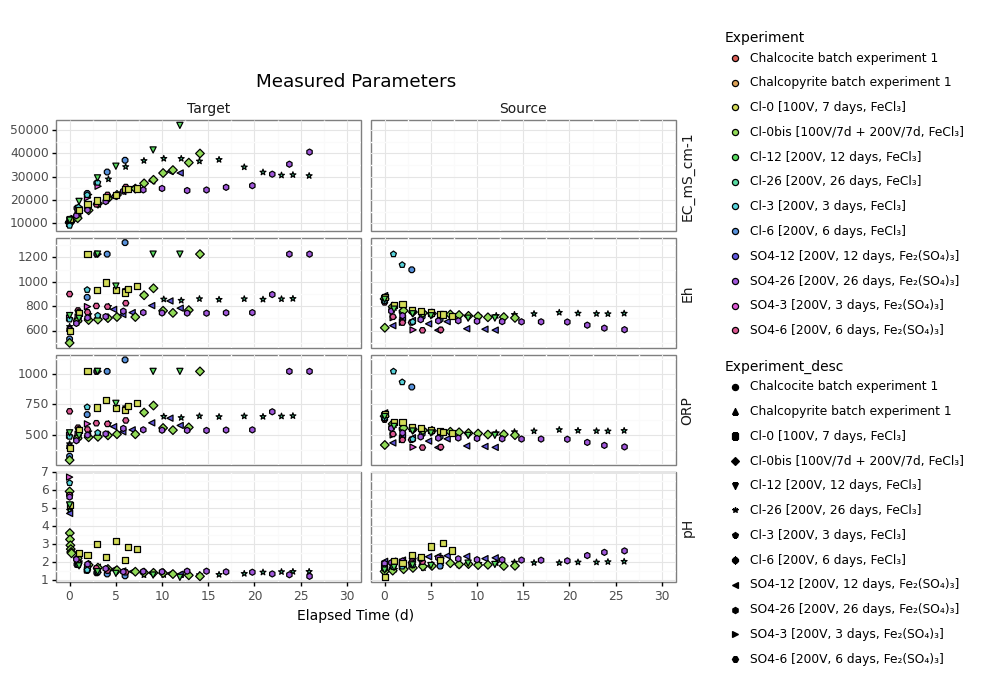

<ggplot: (8765083850183)>

In [8]:
solutionDataMelted_param = solutionDataMelted[(solutionDataMelted['Experiment_type'] == 'Leaching')]
solutionDataMelted_param = solutionDataMelted_param[solutionDataMelted_param['category'] == 'Parameter']
not_plot = ['Anode', 'Cathode', 'Electrical']
solutionDataMelted_param = solutionDataMelted_param[np.logical_not(solutionDataMelted_param['Reservoir'].isin(not_plot))]


plot_param = (ggplot(solutionDataMelted_param, aes(x = 'Time_elapsed_d', y= 'value', fill = 'Experiment_desc', shape =  'Experiment_desc'))
   + geom_point( size =2)
   + ggtitle('Measured Parameters') 
   + facet_grid('variable~Reservoir', scales = 'free_y')
    + labs(x='Elapsed Time (d)', y='', fill = 'Experiment')
   + scale_x_continuous( breaks = [0,5,10,15,20,25,30], limits=(0, 30))
   # + scale_shape_manual(values=[21, 22, 23, 24, 25])

#    + scale_y_continuous(name = 'Iodide concentration [\u03BCM/l]',  limits=(0, 40))
   + theme_bw()
   + theme(figure_size = (8, 6), panel_spacing_x = 0.1,  strip_background = element_text( alpha=0),strip_text_y = element_text(angle = 90, size=10),
            strip_text_x = element_text(angle = 0, size=10),
           legend_background=element_rect(color=None, size=0.1, fill='white', alpha = 0.4), axis_title=element_text(size=10),
           legend_title=element_text(size=10),legend_key=element_rect(alpha=0))
   )
# plot_param.save('./output/parameters_time_series.svg')
plot_param

/home/portega/.local/lib/python3.8/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


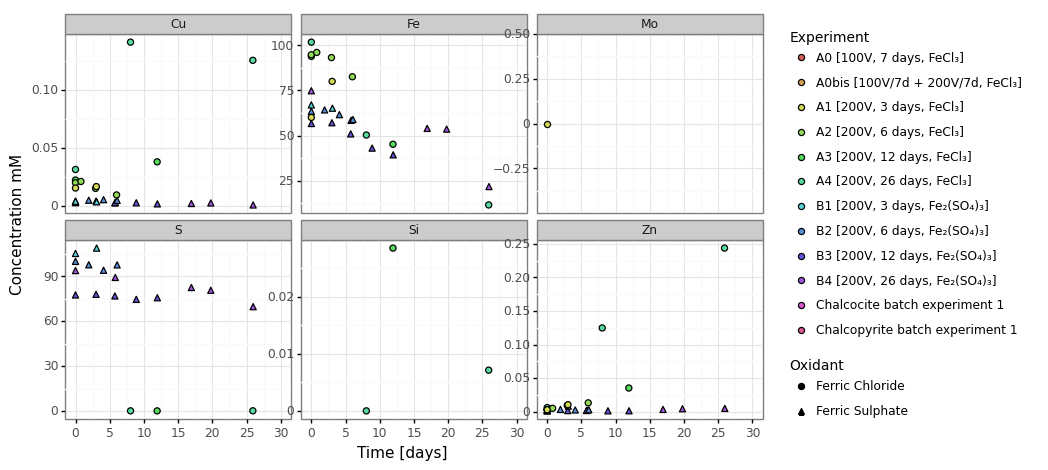

<ggplot: (8745301375826)>

In [16]:
solutionDataMelted_LST = solutionDataMelted[(solutionDataMelted['exp_group'] == 'Slices') & (solutionDataMelted['Reservoir'] == 'Source')]
solutionDataMelted_LST = solutionDataMelted_LST[solutionDataMelted_LST['Sample_ID'] != 'Parameter']


plot_metals = (ggplot(solutionDataMelted_LST, aes(x = 'Time_elapsed_d', y= 'value', fill = 'Experiment_desc', shape = 'Oxidant'))
   + geom_point( size =2)
   + labs(fill='Experiment') 
   + facet_wrap('~variable', scales = 'free_y')
    + labs(x='Elapsed Time (d)', y='Concentration mM')
   + scale_x_continuous(name = 'Time [days]', breaks = [0,5,10,15,20,25,30], limits=(0, 30))
#    + scale_y_continuous(name = 'Iodide concentration [\u03BCM/l]',  limits=(0, 40))
   + theme_bw()
   + theme(figure_size = (9, 5), panel_spacing_x = 0.1,  
           legend_background=element_rect(color=None, size=0.1, fill='white', alpha = 0.4),
           legend_title=element_text(size=10),legend_key=element_rect(alpha=0))
   )
   
plot_metals
# (solutionDataMelted['Reservoir'] == 'Target')  & 
# | (solutionDataMelted['Reservoir'] == 'Source')


/home/portega/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 2 in image.
/home/portega/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./output/current_time_series.svg


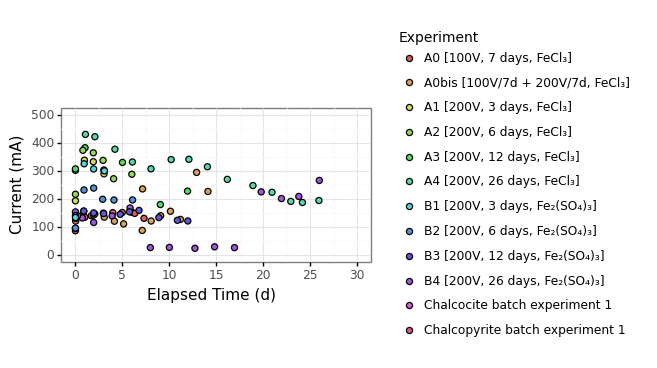

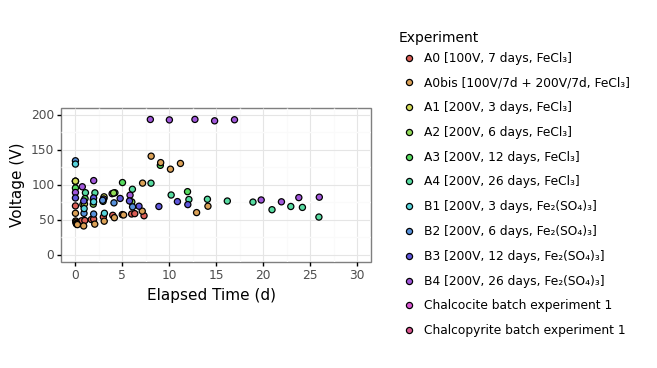

In [22]:
solutionDataMelted_elec = solutionDataMelted[(solutionDataMelted['Experiment_type'] == 'Leaching')]
solutionDataMelted_elec = solutionDataMelted_elec[solutionDataMelted_elec['Reservoir'] == 'Electrical']
# solutionDataMelted_elec = solutionDataMelted_elec[solutionDataMelted_elec['variable'] == 'Current_mA_Electrical']

plot_curr = (ggplot(solutionDataMelted_elec[solutionDataMelted_elec['variable'] == 'Current_mA_Electrical'], aes(x = 'Time_elapsed_d', y= 'value', fill = 'Experiment_desc'))
   + geom_point( size =2)
   + labs(fill='Experiment') 
   + facet_wrap('~variable', scales = 'free_y', ncol=1)
    + labs(x='Elapsed Time (d)', y='Current (mA)')
   + scale_x_continuous(breaks = [0,5,10,15,20,25,30], limits=(0, 30))
   + scale_y_continuous(limits=(0, 500))
   + theme_bw()
   + theme(figure_size = (4, 2), panel_spacing_x = 0.1,  
           legend_background=element_rect(color=None, size=0.1, fill='white', alpha = 0.4),strip_text = element_blank(),
            strip_background = element_text( alpha=0 ),
           legend_title=element_text(size=10),legend_key=element_rect(alpha=0))
   )
plot_curr.save('./output/current_time_series.svg')

plot_volt = (ggplot(solutionDataMelted_elec[solutionDataMelted_elec['variable'] == 'Voltage_gradient_V_Electrical'], aes(x = 'Time_elapsed_d', y= 'value', fill = 'Experiment_desc'))
   + geom_point( size =2)
   + labs(fill='Experiment') 
   + facet_wrap('~variable', scales = 'free_y', ncol=1)
    + labs(x='Elapsed Time (d)', y='Voltage (V)')
   #  +ggtitle('')+
   + scale_x_continuous(breaks = [0,5,10,15,20,25,30], limits=(0, 30))
   + scale_y_continuous(limits=(00, 200))
   + theme_bw()
   + theme(figure_size = (4, 2), panel_spacing_x = 0.1,  
           legend_background=element_rect(color=None, size=0.1, fill='white', alpha = 0.4),strip_text = element_blank(),
            strip_background = element_text( alpha=0 ),
           legend_title=element_text(size=10),legend_key=element_rect(alpha=0))
   )
# plot_volt.save('./output/voltage_time_series.svg')
print(plot_curr, plot_volt)



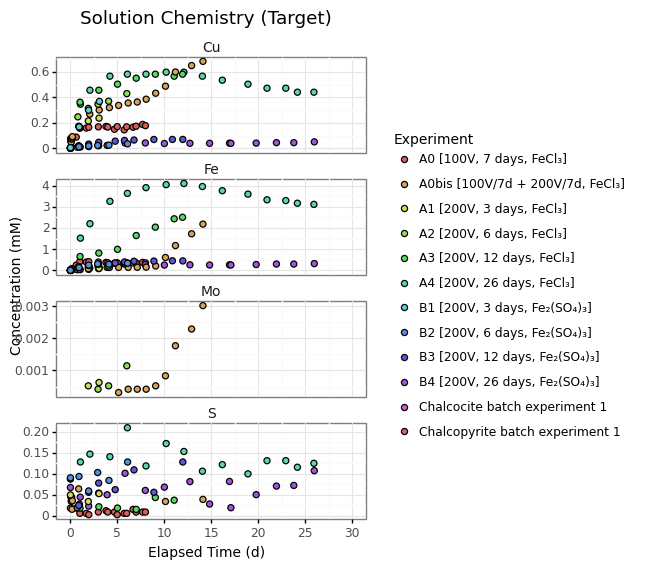

<ggplot: (8746844700435)>

In [23]:
solutionDataMelted_LST = solutionDataMelted[(solutionDataMelted['Experiment_type'] == 'Leaching')]
solutionDataMelted_LST = solutionDataMelted_LST[solutionDataMelted_LST['Reservoir'] == 'Target']
solutionDataMelted_LST = solutionDataMelted_LST[solutionDataMelted_LST['category'] != 'Parameter']
solutionDataMelted_LST = solutionDataMelted_LST[solutionDataMelted_LST['variable'] != 'Zn']
solutionDataMelted_LST = solutionDataMelted_LST[solutionDataMelted_LST['variable'] != 'Si']

plot_metals = (ggplot(solutionDataMelted_LST, aes(x = 'Time_elapsed_d', y= 'value', fill = 'Experiment_desc'))
   + geom_point( size =2)
   + facet_wrap('~variable', scales = 'free_y', ncol=1)
    + labs(x='Elapsed Time (d)', y='Concentration (mM)', fill = 'Experiment')
    +ggtitle('Solution Chemistry (Target)')
   + scale_x_continuous(breaks = [0,5,10,15,20,25,30], limits=(0, 30))
   + theme_bw()
   + theme(figure_size = (4, 6), panel_spacing_x = 0.2,  strip_text = element_text(angle = 0, size=10),
            strip_background = element_text( alpha=0 ),
           legend_background=element_rect(color=None, size=0.1, fill='white', alpha = 1),
           legend_title=element_text(size=10),legend_key=element_rect(alpha=0),
            axis_title=element_text(size=10),panel_spacing=.05)
   )
# plot_metals.save('./output/sol_chem_time_series.svg')
plot_metals

### A0 and A0bis plots

In [9]:
import rpy2
%load_ext rpy2.ipython

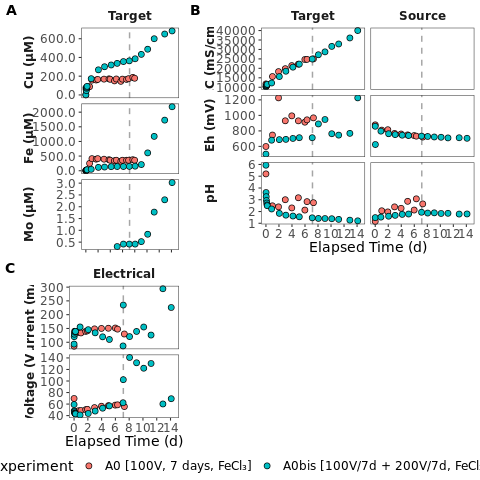

In [25]:
%%R -i solutionDataMelted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.1f", x)

# select A0 and A0bis data from master data set
voltExpData =  subset(solutionDataMelted, exp_group == 'Voltage Experiment' & Experiment_type == 'Leaching')
# print(summary(voltExpData))

############### Solution chemistry
voltExpMetals = subset(voltExpData,  category != 'Parameter'  & variable %in% c('Fe','Cu','Mo') & Reservoir == 'Target' )

variable.labs = c('Cu (μM)', 'Fe (μM)', 'S (μM)', 'Si (μM)', 'Mo (μM)')
names(variable.labs) = c('Cu', 'Fe', 'S', 'Si', 'Mo')
#   expression(paste('Concentration (',mu, 'M)'))
plotMetals = (ggplot(voltExpMetals, aes(x = Time_elapsed_d, y= value*1000, fill = Experiment_desc))
   + geom_vline(xintercept = 7.15, color='#a6a6a6', linetype = 'dashed', size = 0.7)
   + geom_point(size =2.5, shape = 21)
   + facet_grid(variable~Reservoir, scales = 'free_y',switch = 'y', labeller = labeller(variable  = variable.labs))
   + labs(x='Elapsed Time (d)', y = '',fill = 'Experiment')
   # + ggtitle('Solution Chemistry (Target)')
   + scale_x_continuous(limits=c(0, 14.5), breaks=seq(0,16,2))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN, )
   # + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14),strip.placement = 'outside',  strip.background = element_blank(), strip.text = element_text(size=12, face='bold'),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), panel.grid = element_blank(),
    axis.text = element_text(size  = 12))

   )
aspect_ratio = 1.1

ggsave(plot = plotMetals,filename = './output/A0/A0_metals.svg', height = 9 , width = 7 * aspect_ratio)

############### Parameters
voltExpParams = subset(voltExpData,  category == 'Parameter' & Reservoir %in% c('Target', 'Source')& variable != 'ORP')
variable.labs = c('EC (mS/cm)', 'Eh (mV)', 'pH')
names(variable.labs) = c('EC_mS_cm-1', 'Eh', 'pH')

scaleFUN <- function(x) sprintf("%.0f", x)

plotParams = (ggplot(voltExpParams, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))
   + geom_vline(xintercept = 7.15, color='#a6a6a6', linetype = 'dashed', size = 0.7)
   + geom_point(size =2.5, shape = 21)
   + facet_grid(variable~Reservoir, scales = 'free_y', switch = 'y', labeller = labeller(variable  = variable.labs))
   + labs(x='Elapsed Time (d)', y = '', fill = 'Experiment')
   # + ggtitle('Parameters')
   + scale_x_continuous(limits=c(0, 14.5), breaks=seq(0,16,2))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
   # + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14),  strip.background = element_blank(), strip.placement = 'outside', strip.text = element_text(size=12, face = 'bold'),
    strip.text.y=element_text(vjust=6,  margin = margin(l=10)),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,0.2, "cm"), panel.grid = element_blank(),
    axis.text = element_text(size  = 12)) 
   )
aspect_ratio = 1.1

ggsave(plot = plotParams,filename = './output/A0/A0_params.svg', height = 6.75 , width = 12 * aspect_ratio)
plotParams

############### Electrical parameters
voltExpElec = subset(voltExpData,  category == 'Parameter' & Reservoir %in% c('Electrical'))
variable.labs = c('Current (mA)', 'Voltage (V)')
names(variable.labs) = c('Current_mA_Electrical', 'Voltage_gradient_V_Electrical')
# , labeller = labeller(variable  = variable.labs)

plotElec = (ggplot(voltExpElec, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))
   + geom_vline(xintercept = 7.15, color='#a6a6a6', linetype = 'dashed', size = 0.7)
   + geom_point(size =2.5, shape = 21)
   + facet_grid(variable~Reservoir, scales = 'free_y', switch = 'y',  labeller = labeller(variable  = variable.labs))
   + labs(x='Elapsed Time (d)', y = '', fill = 'Experiment')
   # + ggtitle('Parameters')
   + scale_x_continuous(limits=c(0, 14.5), breaks=seq(0,16,2))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
   # + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14), strip.background = element_blank(), strip.placement = 'outside', strip.text = element_text(size=12, face = 'bold'),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.4, "cm"), panel.grid = element_blank(), strip.text.y = element_text(vjust=3.5),
    axis.text = element_text(size  = 12))
   )
aspect_ratio = 1.1

ggsave(plot = plotElec,filename = './output/A0/A0_Elec.svg', height = 4.5 , width = 7 * aspect_ratio)
plotElec

mosaicA0 = ggarrange(plotMetals+rremove('x.text')+rremove('xlab'),ggarrange(plotParams, ncol=1, nrow=2, heights =c(50,0),legend=FALSE) , plotElec,
 nrow=2, ncol=2, common.legend=TRUE, heights = c(1,0.75), widths = c(1,1.6),align = 'v', legend= 'bottom', labels = c('A','B','C'))



aspect_ratio = 1
ggsave(mosaicA0, filename = './output/A0/A0_mosaic_ts.svg', height = 8.5 , width = 9 * aspect_ratio)
mosaicA0

### Batch experiments plots

In [26]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


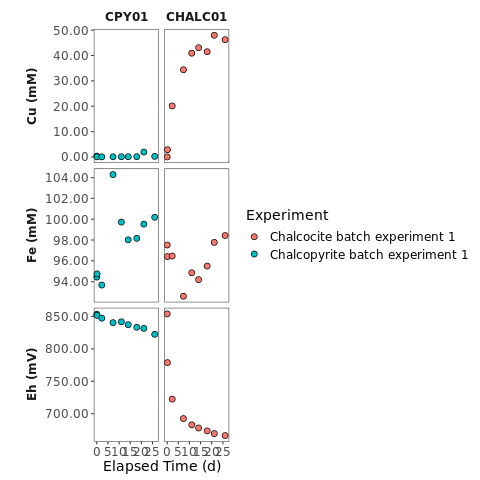

In [27]:
%%R -i solutionDataMelted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

# select A0 and A0bis data from master data set
batchData =  subset(solutionDataMelted, exp_group == 'Batch')
############### Solution chemistry
batchDataMetals = subset(batchData,  variable %in% c('Cu', 'Fe', 'S', 'Eh') )
# print(summary(batchDataMetals))
variable.labs = c('Cu (mM)', 'Fe (mM)', 'S (mM)', 'Eh (mV)')
names(variable.labs) = c('Cu', 'Fe', 'S', 'Eh')
batchDataMetals$variable = factor(batchDataMetals$variable, levels=c('Cu', 'Fe', 'S', 'Eh'))
batchDataMetals$Experiment = factor(batchDataMetals$Experiment, levels=c('CPY01', 'CHALC01'))

plotMetals = (ggplot(batchDataMetals, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))
   + geom_point(size =2.5, shape = 21)
   + facet_grid(variable~Experiment, scales = 'free_y',switch = 'y', labeller = labeller(variable  = variable.labs))
   + labs(x='Elapsed Time (d)', y = '',fill = 'Experiment')
   + scale_x_continuous(limits=c(0, 26.5), breaks=seq(0,26,5))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN, )
   # + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14),strip.placement = 'outside',  strip.background = element_blank(), strip.text = element_text(size=12, face='bold'),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), panel.grid = element_blank(),
    axis.text = element_text(size  = 12))

   )
aspect_ratio = 1.1

ggsave(plot = plotMetals,filename = './output/batch/batch_metals.svg', height = 4 , width = 7 * aspect_ratio)
plotMetals


### Slice Experiments 

In [10]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [20]:
%%R -i solutionDataMelted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

# select slice data from master data set
sliceData =  subset(solutionDataMelted, exp_group == 'Slices' & Experiment_type == 'Leaching')
sliceData$short_id = factor(sliceData$short_id,  levels=c('Cl-3','Cl-6', 'Cl-12', 'Cl-26', 'SO4-3', 'SO4-6', 'SO4-12','SO4-26'))

sliceMetals = subset(sliceData,  category != 'Parameter'  & variable %in% c('Fe','Cu','S', 'Si') & Reservoir == 'Source' )
variable.labs = c('Cu (mM)', 'Fe (mM)', 'S (mM)', 'Si (mM)')
names(variable.labs) = c('Cu', 'Fe', 'S', 'Si')
plotMetals = (ggplot(sliceMetals, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))
   + geom_point(size =2.5)
   + facet_grid(variable~Reservoir, scales = 'free_y',switch = 'y', labeller = labeller(variable  = variable.labs))
   + labs(x='Elapsed Time (d)', y = '',fill = 'Experiment')
   # + ggtitle('Solution Chemistry (Target)')
   + scale_x_continuous(limits=c(0, 26.5), breaks=seq(0,30,5))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA), labels=scaleFUN )
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + guides(fill=guide_legend(override.aes=list(shape=21)))
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14),strip.placement = 'outside',  strip.background = element_blank(), strip.text = element_text(size=12, face='bold'),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), panel.grid = element_blank(),
    axis.text = element_text(size  = 12))

   )
aspect_ratio = 1.1
ggsave(plot = plotMetals,filename = './output/slices/recovery_params/slices_metals_source.svg', height = 9 , width = 5 * aspect_ratio)

############### Parameters
# sliceParams = subset(sliceData,  category == 'Parameter' & Reservoir %in% c('Target', 'Source')& variable != 'ORP')
# variable.labs = c('EC (mS/cm)', 'Eh (mV)', 'pH')
# names(variable.labs) = c('EC_mS_cm-1', 'Eh', 'pH')

# scaleFUN <- function(x) sprintf("%.0f", x)

# plotParams = (ggplot(sliceParams, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))
#    + geom_point(size =2.5)
#    + facet_grid(variable~Reservoir, scales = 'free_y', switch = 'y', labeller = labeller(variable  = variable.labs))
#    + labs(x='Elapsed Time (d)', y = '')
#    # + ggtitle('Parameters')
#    + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
#    + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
#    + scale_shape_manual(name = 'Oxidant', values=c(21, 22, 23, 24, 25))
#    + scale_fill_manual(name = 'Experimental Series', drop=TRUE, values=c('#003f5c', '#7a5195', '#ef5675', '#FFFFFF','#003f5c', '#7a5195', '#ef5675', '#ffa600'))
#     + guides(fill=guide_legend(override.aes=list(shape=c(21,21,21,21,22,22,22,22))))
#    + theme_bw()
#    + theme(text = element_text(family = 'arial', size = 14),  strip.background = element_blank(), strip.placement = 'outside', strip.text = element_text(size=12, face = 'bold'),
#     strip.text.y=element_text(vjust=5.5,  margin = margin(l=10)),
#     legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,0.2, "cm"), panel.grid = element_blank(),
#     axis.text = element_text(size  = 12),   panel.grid.major = element_line(size = 0.05,colour = "grey")) 
#    )
# aspect_ratio = 1.

# # ggsave(plot = plotParams,filename = './output/slices/recovery_params/slices_params.svg', height = 6 , width = 10 * aspect_ratio)
# # ggsave(plot = plotParams,filename = './output/slices/recovery_params/slices_params.pdf', height = 6 , width = 10 * aspect_ratio)
# plotParams


# ############### Electrical parameters
# sliceElec = subset(sliceData,  category == 'Parameter' & Reservoir %in% c('Electrical'))
# variable.labs = c('Current (mA)', 'Voltage (V)')
# names(variable.labs) = c('Current_mA_Electrical', 'Voltage_gradient_V_Electrical')

# plotElec = (ggplot(sliceElec, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))
#    + geom_point(size =2.5)
#    + facet_grid(variable~Oxidant, scales = 'free_y', switch = 'y',  labeller = labeller(variable  = variable.labs))
#    + labs(x='Elapsed Time (d)', y = '', fill = 'Experiment')
#    # + ggtitle('Parameters')
#    + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
#    + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
#    + scale_shape_manual(name = 'Oxidant', values=c(21, 22, 23, 24, 25))
#    + scale_fill_manual(name = 'Experimental Series', drop=TRUE, values=c('#003f5c', '#7a5195', '#ef5675', '#FFFFFF','#003f5c', '#7a5195', '#ef5675', '#ffa600'))
#     + guides(fill=guide_legend(override.aes=list(shape=c(21,21,21,21,22,22,22,22))))
#    + theme_bw()
#    + theme(text = element_text(family = 'arial', size = 14), strip.background = element_blank(), strip.placement = 'outside', strip.text = element_text(size=12, face = 'bold'),
#     legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.4, "cm"), panel.grid = element_blank(), strip.text.y = element_text(vjust=2.5),
#     axis.text = element_text(size  = 12),  panel.grid.major = element_line(size = 0.05,colour = "grey"))
#    )
# aspect_ratio = 1

# ggsave(plot = plotElec,filename = './output/slices/recovery_params/slices_Elec.svg', height = 4.5 , width = 10 * aspect_ratio)
# ggsave(plot = plotElec,filename = './output/slices/recovery_params/slices_Elec.eps', height = 4.5 , width = 10 * aspect_ratio)
# plotElec

# mosaicA0 = ggarrange(plotMetals+rremove('x.text')+rremove('xlab'),ggarrange(plotParams, ncol=1, nrow=2, heights =c(5,1),legend=FALSE) , plotElec,
#  nrow=2, ncol=2, common.legend=TRUE, heights = c(1,0.6), widths = c(1,1.6),align = 'v', legend= 'bottom', labels = c('A','B','C'))

# aspect_ratio = 1
# ggsave(mosaicA0, filename = './output/slices/slices_mosaic_ts.svg', height = 9.5 , width = 9 * aspect_ratio)
# mosaicA0

In [13]:
%%R -i solutionDataMelted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

# select slice data from master data set
sliceData =  subset(solutionDataMelted, exp_group == 'Slices' & Experiment_type == 'Leaching')
sliceData$short_id = factor(sliceData$short_id, levels=c('A1','A2', 'A3', 'A4', 'B1', 'B2', 'B3','B4'))

sliceMetals = subset(sliceData,  category != 'Parameter'  & variable %in% c('Fe','Cu','S', 'Si') & Reservoir == 'Target' )

variable.labs = c('Cu (mM)', 'Fe (mM)', 'S (mM)', 'Si (mM)')
names(variable.labs) = c('Cu', 'Fe', 'S', 'Si')
plotMetals = (ggplot(sliceMetals, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))
   + geom_point(size =2.5)
   + facet_grid(variable~Reservoir, scales = 'free_y',switch = 'y', labeller = labeller(variable  = variable.labs))
   + labs(x='Elapsed Time (d)', y = '',fill = 'Experiment')
   # + ggtitle('Solution Chemistry (Target)')
   + scale_x_continuous(limits=c(0, 26.5), breaks=seq(0,30,5))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN, )
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + guides(fill=guide_legend(override.aes=list(shape=21)))
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14),strip.placement = 'outside',  strip.background = element_blank(), strip.text = element_text(size=12, face='bold'),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), panel.grid = element_blank(),
    axis.text = element_text(size  = 12))

   )
aspect_ratio = 1.1

ggsave(plot = plotMetals,filename = './output/slices/slices_metals.svg', height = 9 , width = 5 * aspect_ratio)

############### Parameters
sliceParams = subset(sliceData,  category == 'Parameter' & Reservoir %in% c('Target', 'Source')& variable != 'ORP')
variable.labs = c('EC (mS/cm)', 'Eh (mV)', 'pH')
names(variable.labs) = c('EC_mS_cm-1', 'Eh', 'pH')

scaleFUN <- function(x) sprintf("%.0f", x)

plotParams = (ggplot(sliceParams, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))
   + geom_point(size =2.5)
   + facet_grid(variable~Reservoir, scales = 'free_y', switch = 'y', labeller = labeller(variable  = variable.labs))
   + labs(x='Elapsed Time (d)', y = '', fill = 'Experiment')
   # + ggtitle('Parameters')
   + scale_x_continuous(limits=c(0, 26.5), breaks=seq(0,30,5))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14),  strip.background = element_blank(), strip.placement = 'outside', strip.text = element_text(size=12, face = 'bold'),
    strip.text.y=element_text(vjust=6,  margin = margin(l=10)),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,0.2, "cm"), panel.grid = element_blank(),
    axis.text = element_text(size  = 12)) 
   )
aspect_ratio = 1.1

ggsave(plot = plotParams,filename = './output/slices/slices_params.svg', height = 6.75 , width = 12 * aspect_ratio)
plotParams


############### Electrical parameters
sliceElec = subset(sliceData,  category == 'Parameter' & Reservoir %in% c('Electrical'))
variable.labs = c('Current (mA)', 'Voltage (V)')
names(variable.labs) = c('Current_mA_Electrical', 'Voltage_gradient_V_Electrical')

plotElec = (ggplot(sliceElec, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))
   + geom_point(size =2.5)
   + facet_grid(variable~Reservoir, scales = 'free_y', switch = 'y',  labeller = labeller(variable  = variable.labs))
   + labs(x='Elapsed Time (d)', y = '', fill = 'Experiment')
   # + ggtitle('Parameters')
   + scale_x_continuous(limits=c(0, 26.5), breaks=seq(0,30,5))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14), strip.background = element_blank(), strip.placement = 'outside', strip.text = element_text(size=12, face = 'bold'),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.4, "cm"), panel.grid = element_blank(), strip.text.y = element_text(vjust=3.5),
    axis.text = element_text(size  = 12))
   )
aspect_ratio = 1

ggsave(plot = plotElec,filename = './output/slices/slices_Elec.svg', height = 4.5 , width = 8 * aspect_ratio)
plotElec

mosaicA0 = ggarrange(plotMetals+rremove('x.text')+rremove('xlab'),ggarrange(plotParams, ncol=1, nrow=2, heights =c(5,1),legend=FALSE) , plotElec,
 nrow=2, ncol=2, common.legend=TRUE, heights = c(1,0.6), widths = c(1,1.6),align = 'v', legend= 'bottom', labels = c('A','B','C'))

aspect_ratio = 1
ggsave(mosaicA0, filename = './output/slices/slices_mosaic_ts.svg', height = 9.5 , width = 9 * aspect_ratio)
mosaicA0

R[write to console]: Error: Must request at least one colour from a hue palette.




Error: Must request at least one colour from a hue palette.


RInterpreterError: Failed to parse and evaluate line '\nlibrary(ggplot2)\nlibrary(ggpubr)\nscaleFUN <- function(x) sprintf("%.2f", x)\n\n# select slice data from master data set\nsliceData =  subset(solutionDataMelted, exp_group == \'Slices\' & Experiment_type == \'Leaching\')\nsliceData$short_id = factor(sliceData$short_id, levels=c(\'A1\',\'A2\', \'A3\', \'A4\', \'B1\', \'B2\', \'B3\',\'B4\'))\n\nsliceMetals = subset(sliceData,  category != \'Parameter\'  & variable %in% c(\'Fe\',\'Cu\',\'S\', \'Si\') & Reservoir == \'Target\' )\n\nvariable.labs = c(\'Cu (mM)\', \'Fe (mM)\', \'S (mM)\', \'Si (mM)\')\nnames(variable.labs) = c(\'Cu\', \'Fe\', \'S\', \'Si\')\nplotMetals = (ggplot(sliceMetals, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))\n   + geom_point(size =2.5)\n   + facet_grid(variable~Reservoir, scales = \'free_y\',switch = \'y\', labeller = labeller(variable  = variable.labs))\n   + labs(x=\'Elapsed Time (d)\', y = \'\',fill = \'Experiment\')\n   # + ggtitle(\'Solution Chemistry (Target)\')\n   + scale_x_continuous(limits=c(0, 26.5), breaks=seq(0,30,5))\n   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN, )\n   + scale_shape_manual(values=c(21, 22, 23, 24, 25))\n   + guides(fill=guide_legend(override.aes=list(shape=21)))\n   + theme_bw()\n   + theme(text = element_text(family = \'arial\', size = 14),strip.placement = \'outside\',  strip.background = element_blank(), strip.text = element_text(size=12, face=\'bold\'),\n    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), panel.grid = element_blank(),\n    axis.text = element_text(size  = 12))\n\n   )\naspect_ratio = 1.1\n\nggsave(plot = plotMetals,filename = \'./output/slices/slices_metals.svg\', height = 9 , width = 5 * aspect_ratio)\n\n############### Parameters\nsliceParams = subset(sliceData,  category == \'Parameter\' & Reservoir %in% c(\'Target\', \'Source\')& variable != \'ORP\')\nvariable.labs = c(\'EC (mS/cm)\', \'Eh (mV)\', \'pH\')\nnames(variable.labs) = c(\'EC_mS_cm-1\', \'Eh\', \'pH\')\n\nscaleFUN <- function(x) sprintf("%.0f", x)\n\nplotParams = (ggplot(sliceParams, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))\n   + geom_point(size =2.5)\n   + facet_grid(variable~Reservoir, scales = \'free_y\', switch = \'y\', labeller = labeller(variable  = variable.labs))\n   + labs(x=\'Elapsed Time (d)\', y = \'\', fill = \'Experiment\')\n   # + ggtitle(\'Parameters\')\n   + scale_x_continuous(limits=c(0, 26.5), breaks=seq(0,30,5))\n   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)\n   + scale_shape_manual(values=c(21, 22, 23, 24, 25))\n   + theme_bw()\n   + theme(text = element_text(family = \'arial\', size = 14),  strip.background = element_blank(), strip.placement = \'outside\', strip.text = element_text(size=12, face = \'bold\'),\n    strip.text.y=element_text(vjust=6,  margin = margin(l=10)),\n    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,0.2, "cm"), panel.grid = element_blank(),\n    axis.text = element_text(size  = 12)) \n   )\naspect_ratio = 1.1\n\nggsave(plot = plotParams,filename = \'./output/slices/slices_params.svg\', height = 6.75 , width = 12 * aspect_ratio)\nplotParams\n\n\n############### Electrical parameters\nsliceElec = subset(sliceData,  category == \'Parameter\' & Reservoir %in% c(\'Electrical\'))\nvariable.labs = c(\'Current (mA)\', \'Voltage (V)\')\nnames(variable.labs) = c(\'Current_mA_Electrical\', \'Voltage_gradient_V_Electrical\')\n\nplotElec = (ggplot(sliceElec, aes(x = Time_elapsed_d, y= value, fill = short_id, shape = Oxidant))\n   + geom_point(size =2.5)\n   + facet_grid(variable~Reservoir, scales = \'free_y\', switch = \'y\',  labeller = labeller(variable  = variable.labs))\n   + labs(x=\'Elapsed Time (d)\', y = \'\', fill = \'Experiment\')\n   # + ggtitle(\'Parameters\')\n   + scale_x_continuous(limits=c(0, 26.5), breaks=seq(0,30,5))\n   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)\n   + scale_shape_manual(values=c(21, 22, 23, 24, 25))\n   + theme_bw()\n   + theme(text = element_text(family = \'arial\', size = 14), strip.background = element_blank(), strip.placement = \'outside\', strip.text = element_text(size=12, face = \'bold\'),\n    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.4, "cm"), panel.grid = element_blank(), strip.text.y = element_text(vjust=3.5),\n    axis.text = element_text(size  = 12))\n   )\naspect_ratio = 1\n\nggsave(plot = plotElec,filename = \'./output/slices/slices_Elec.svg\', height = 4.5 , width = 8 * aspect_ratio)\nplotElec\n\nmosaicA0 = ggarrange(plotMetals+rremove(\'x.text\')+rremove(\'xlab\'),ggarrange(plotParams, ncol=1, nrow=2, heights =c(5,1),legend=FALSE) , plotElec,\n nrow=2, ncol=2, common.legend=TRUE, heights = c(1,0.6), widths = c(1,1.6),align = \'v\', legend= \'bottom\', labels = c(\'A\',\'B\',\'C\'))\n\naspect_ratio = 1\nggsave(mosaicA0, filename = \'./output/slices/slices_mosaic_ts.svg\', height = 9.5 , width = 9 * aspect_ratio)\nmosaicA0\n'.
R error message: 'Error: Must request at least one colour from a hue palette.'

## Paper Plots

This section comprises the final plots for the paper

In [8]:
import rpy2
%load_ext rpy2.ipython

In [14]:
%%R -i solutionDataMelted

library(ggplot2)
library(ggpubr)

#break functions
scaleFUN <- function(x) sprintf("%.2f", x)

equal_breaks <- function(n = 3, s = 0.05, ...){
  function(x){
    # rescaling
    d <- s * diff(range(x)) / (1+2*s)
    seq(min(x)+d, max(x)-d, length=n)
  }}
##################################################################################################################
sliceSelected = subset(solutionDataMelted, Experiment_type == 'Leaching' & Reservoir == 'Target' & category != 'Parameter' & 
                  Experiment_desc != 'Martens' & variable != 'Zn'& variable != 'Si' & variable != 'Mo')
sliceSelected$short_id = factor(sliceSelected$short_id, levels=c('A1','A2', 'A3', 'A4', 'B1', 'B2', 'B3','B4'))

slicesA =  subset(sliceSelected, exp_group == 'Slices' & Oxidant == 'Ferric Chloride')
slicesB = subset(sliceSelected, exp_group == 'Slices' & Oxidant == 'Ferric Sulphate')
slicesAll = subset(sliceSelected, exp_group == 'Slices')

##################################################################################################################


plotA = (ggplot(slicesA, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))
   + geom_point(size =2.5, shape = 21)
   + facet_wrap(~variable, scales = 'free_y', ncol=1, strip.position='top')
   + labs(x='Elapsed Time (d)', y='Concentration (mM)', fill = 'Experiment')
#    + ggtitle('Solution Chemistry (Target)')
   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
   + scale_fill_discrete(drop=FALSE)
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"),
    axis.text = element_text(size  = 12), legend.position = 'none')

   )
plotA
plotB = (ggplot(slicesB, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))
   + geom_point(size =2.5, shape = 22)
   + facet_wrap(~variable, scales = 'free_y', ncol=1, strip.position='top')
   + labs(x='Elapsed Time (d)', y='Concentration (mM)', fill = 'Experiment')
#    + ggtitle('Solution Chemistry (Target)')
   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
   + scale_fill_discrete(drop=FALSE)
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"),
    axis.text = element_text(size  = 12), legend.position = 'none')

   )
slicesBzoom = subset(slicesB, short_id != 'B1' & variable == 'Cu')
plotB_zoom  = (ggplot(slicesBzoom, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))
   + geom_point(size =2.5, shape = 22)
   + facet_wrap(~variable, scales = 'free_y', ncol=1, strip.position='top')
   + labs(x='Elapsed Time (d)', y=bquote('Concentration (mol '~ L^-1 ~')'), fill = 'Experiment')
#    + ggtitle('Solution Chemistry (Target)')
   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
   + scale_fill_discrete(drop=FALSE)
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)
   + theme_bw()
   + theme(text = element_text(family = 'arial', size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"),
    axis.text = element_text(size  = 12), legend.position = 'none')

   )

plist = list()
j=1
s_units = bquote(' (mol '~ L^-1 ~')')

oxidants_to_plot = c('Ferric Chloride', 'Ferric Sulphate')
elements_to_plot = c('Cu', 'Fe')
shape = 21
k = 0
for (ox in oxidants_to_plot){
   slicesAll_temp = slicesAll[slicesAll$Oxidant == ox,]
for (element in elements_to_plot) {
   # paste(element, 'mM')
plist[[j]] = (ggplot(slicesAll_temp[slicesAll_temp$variable == element,], aes(x = Time_elapsed_d, y= value, fill = short_id))
   + geom_point(size =2.5, shape = shape+k)
   + labs(x='Elapsed Time (d)', y=bquote(.(element)~'(mmol '~ L^-1 ~')'), fill = 'Experiment')
   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
   + ggtitle('')
   + scale_fill_discrete(drop=TRUE)
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + scale_y_continuous(breaks = scales::pretty_breaks(10), limits = c(0.0000001, NA),labels=scaleFUN)
   + theme_bw()
   + theme(text = element_text(size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), 
    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)
j = j+1
 } 
k = k+1
}
##################################################################################################################3
mosaic = ggarrange(ggarrange(plist[[1]], plist[[2]], ncol=1, common.legend=TRUE, legend= 'bottom', align = 'hv'), 
                  ggarrange(plist[[3]], plist[[4]], ncol=1, common.legend=TRUE, legend= 'bottom', align = 'hv'), 
                  ncol =2, labels = c('Ferric Chloride','Ferric Sulphate'))

# ggarrange(plot_curr+rremove('xlab')+rremove('x.text')+rremove('x.ticks'), 
# plot_volt+rremove('xlab')+rremove('x.text')+rremove('x.ticks'), plot_pH, plot_orp, align = 'hv',nrow=2, ncol = 2, heights = c(1,2.1)), 
# ncol=2, nrow=1, align='hv',common.legend=TRUE, widths = c(1,1.8), legend= 'right')
# aspect_ratio = 10/7
# ggsave(mosaic, filename = './output/slices/solution_chem_time_series_separated_plots.svg', height = 7 , width = 10)
# ggsave(mosaic, filename = './output/slices/solution_chem_time_series_separated_plots.pdf', height = 7 , width = 10, device = 'pdf')

plist[[1]]

R[write to console]: Error: Must request at least one colour from a hue palette.




Error: Must request at least one colour from a hue palette.


RInterpreterError: Failed to parse and evaluate line '\nlibrary(ggplot2)\nlibrary(ggpubr)\n\n#break functions\nscaleFUN <- function(x) sprintf("%.2f", x)\n\nequal_breaks <- function(n = 3, s = 0.05, ...){\n  function(x){\n    # rescaling\n    d <- s * diff(range(x)) / (1+2*s)\n    seq(min(x)+d, max(x)-d, length=n)\n  }}\n##################################################################################################################\nsliceSelected = subset(solutionDataMelted, Experiment_type == \'Leaching\' & Reservoir == \'Target\' & category != \'Parameter\' & \n                  Experiment_desc != \'Martens\' & variable != \'Zn\'& variable != \'Si\' & variable != \'Mo\')\nsliceSelected$short_id = factor(sliceSelected$short_id, levels=c(\'A1\',\'A2\', \'A3\', \'A4\', \'B1\', \'B2\', \'B3\',\'B4\'))\n\nslicesA =  subset(sliceSelected, exp_group == \'Slices\' & Oxidant == \'Ferric Chloride\')\nslicesB = subset(sliceSelected, exp_group == \'Slices\' & Oxidant == \'Ferric Sulphate\')\nslicesAll = subset(sliceSelected, exp_group == \'Slices\')\n\n##################################################################################################################\n\n\nplotA = (ggplot(slicesA, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))\n   + geom_point(size =2.5, shape = 21)\n   + facet_wrap(~variable, scales = \'free_y\', ncol=1, strip.position=\'top\')\n   + labs(x=\'Elapsed Time (d)\', y=\'Concentration (mM)\', fill = \'Experiment\')\n#    + ggtitle(\'Solution Chemistry (Target)\')\n   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))\n   + scale_fill_discrete(drop=FALSE)\n   + scale_shape_manual(values=c(21, 22, 23, 24, 25))\n   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)\n   + theme_bw()\n   + theme(text = element_text(family = \'arial\', size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),\n    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"),\n    axis.text = element_text(size  = 12), legend.position = \'none\')\n\n   )\nplotA\nplotB = (ggplot(slicesB, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))\n   + geom_point(size =2.5, shape = 22)\n   + facet_wrap(~variable, scales = \'free_y\', ncol=1, strip.position=\'top\')\n   + labs(x=\'Elapsed Time (d)\', y=\'Concentration (mM)\', fill = \'Experiment\')\n#    + ggtitle(\'Solution Chemistry (Target)\')\n   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))\n   + scale_fill_discrete(drop=FALSE)\n   + scale_shape_manual(values=c(21, 22, 23, 24, 25))\n   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)\n   + theme_bw()\n   + theme(text = element_text(family = \'arial\', size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),\n    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"),\n    axis.text = element_text(size  = 12), legend.position = \'none\')\n\n   )\nslicesBzoom = subset(slicesB, short_id != \'B1\' & variable == \'Cu\')\nplotB_zoom  = (ggplot(slicesBzoom, aes(x = Time_elapsed_d, y= value, fill = Experiment_desc))\n   + geom_point(size =2.5, shape = 22)\n   + facet_wrap(~variable, scales = \'free_y\', ncol=1, strip.position=\'top\')\n   + labs(x=\'Elapsed Time (d)\', y=bquote(\'Concentration (mol \'~ L^-1 ~\')\'), fill = \'Experiment\')\n#    + ggtitle(\'Solution Chemistry (Target)\')\n   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))\n   + scale_fill_discrete(drop=FALSE)\n   + scale_shape_manual(values=c(21, 22, 23, 24, 25))\n   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(NA, NA),labels=scaleFUN)\n   + theme_bw()\n   + theme(text = element_text(family = \'arial\', size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),\n    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"),\n    axis.text = element_text(size  = 12), legend.position = \'none\')\n\n   )\n\nplist = list()\nj=1\ns_units = bquote(\' (mol \'~ L^-1 ~\')\')\n\noxidants_to_plot = c(\'Ferric Chloride\', \'Ferric Sulphate\')\nelements_to_plot = c(\'Cu\', \'Fe\')\nshape = 21\nk = 0\nfor (ox in oxidants_to_plot){\n   slicesAll_temp = slicesAll[slicesAll$Oxidant == ox,]\nfor (element in elements_to_plot) {\n   # paste(element, \'mM\')\nplist[[j]] = (ggplot(slicesAll_temp[slicesAll_temp$variable == element,], aes(x = Time_elapsed_d, y= value, fill = short_id))\n   + geom_point(size =2.5, shape = shape+k)\n   + labs(x=\'Elapsed Time (d)\', y=bquote(.(element)~\'(mmol \'~ L^-1 ~\')\'), fill = \'Experiment\')\n   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))\n   + ggtitle(\'\')\n   + scale_fill_discrete(drop=TRUE)\n   + scale_shape_manual(values=c(21, 22, 23, 24, 25))\n   + scale_y_continuous(breaks = scales::pretty_breaks(10), limits = c(0.0000001, NA),labels=scaleFUN)\n   + theme_bw()\n   + theme(text = element_text(size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),\n    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), \n    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))\n)\nj = j+1\n } \nk = k+1\n}\n##################################################################################################################3\nmosaic = ggarrange(ggarrange(plist[[1]], plist[[2]], ncol=1, common.legend=TRUE, legend= \'bottom\', align = \'hv\'), \n                  ggarrange(plist[[3]], plist[[4]], ncol=1, common.legend=TRUE, legend= \'bottom\', align = \'hv\'), \n                  ncol =2, labels = c(\'Ferric Chloride\',\'Ferric Sulphate\'))\n\n# ggarrange(plot_curr+rremove(\'xlab\')+rremove(\'x.text\')+rremove(\'x.ticks\'), \n# plot_volt+rremove(\'xlab\')+rremove(\'x.text\')+rremove(\'x.ticks\'), plot_pH, plot_orp, align = \'hv\',nrow=2, ncol = 2, heights = c(1,2.1)), \n# ncol=2, nrow=1, align=\'hv\',common.legend=TRUE, widths = c(1,1.8), legend= \'right\')\n# aspect_ratio = 10/7\n# ggsave(mosaic, filename = \'./output/slices/solution_chem_time_series_separated_plots.svg\', height = 7 , width = 10)\n# ggsave(mosaic, filename = \'./output/slices/solution_chem_time_series_separated_plots.pdf\', height = 7 , width = 10, device = \'pdf\')\n\nplist[[1]]\n'.
R error message: 'Error: Must request at least one colour from a hue palette.'

# Copper and iron recovery     



## Cu calculations

In [14]:
Cu_raw = solutionDataMelted[(solutionDataMelted['variable'] == 'Cu')]
Cu_raw = Cu_raw[(Cu_raw['Reservoir'] == 'Target') & (Cu_raw['exp_group'] == 'Slices') ]
Cu_raw = Cu_raw[['Experiment', 'Time_elapsed_d', 'variable', 'value', 'Experiment_desc', 'short_id', 'Oxidant']]
Cu_raw 

,Experiment,Time_elapsed_d,variable,value,Experiment_desc,short_id,Oxidant
383,BHPC24S2,0.00000,Cu,0.000000,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
385,BHPC24S2,1.06250,Cu,0.346206,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
386,BHPC24S2,2.07223,Cu,0.456362,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
387,BHPC24S2,4.20139,Cu,0.566519,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
388,BHPC24S2,6.06250,Cu,0.582255,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
...,...,...,...,...,...,...,...
547,BHPC27S5,6.07986,Cu,0.034935,"SO4-6 [200V, 6 days, Fe₂(SO₄)₃]",SO4-6,Ferric Sulphate
550,BHPC27S6,0.00000,Cu,0.000000,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate
553,BHPC27S6,0.92500,Cu,0.014478,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate
554,BHPC27S6,1.93403,Cu,0.026752,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate


In [15]:
total_init_conc = pd.read_csv('./input/slice_experiments_init_conc.csv', skiprows  =0)
total_init_conc['Cu_lost_per_day'] = total_init_conc['Cu_recovered_external_mmol']/total_init_conc['time_days']
# np.where(total_init_conc['Experiment'] == 'BHPC24S2', 
#             (total_init_conc['Cu_recovered_external_mmol'])/20, 
#             (total_init_conc['Cu_recovered_external_mmol'])/total_init_conc['time_days'])
Cu_init_conc = total_init_conc[['Experiment', 'Cu_recovered_external_mmol','Cu_total_corrected_mmol', 'Cu_lost_per_day']]
Cu_init_conc

,Experiment,Cu_recovered_external_mmol,Cu_total_corrected_mmol,Cu_lost_per_day
0,BHPC24S7,0.000000,5.88,0.000000
1,BHPC24S5,0.101061,6.96,0.016843
2,BHPC24S3,0.189469,7.38,0.015789
3,BHPC24S2,17.168036,20.90,0.660309
4,BHPC27S6,0.000000,0.77,0.000000
5,BHPC27S5,0.000000,1.01,0.000000
6,BHPC27S8,0.000000,1.56,0.000000
7,BHPC27S4,0.133925,1.12,0.005151


In [16]:
lost_mass_factor_BHPC24S2 = 2.7
# (1.7+ 17.2)/7.1 #(mass recovered in external / max recovery in target (0.597992006 mmol/L) 7.1759
Cu_recovered = pd.merge(Cu_raw, Cu_init_conc)
Cu_recovered['Cu_lost_per_sample'] = Cu_recovered['Time_elapsed_d']*Cu_recovered['Cu_lost_per_day']
Cu_recovered["Cu_recovered_mmol"] = np.where(Cu_recovered["Experiment"] != 'BHPC24S2',Cu_recovered['value']*12 + Cu_recovered['Cu_lost_per_sample'],
                                    Cu_recovered['value']*12*lost_mass_factor_BHPC24S2)
Cu_recovered['Cu_recovered_%'] = Cu_recovered["Cu_recovered_mmol"]/ Cu_recovered['Cu_total_corrected_mmol']*100
# Cu_recovered['Cu_recovered_%'] = np.where(Cu_recovered['Cu_recovered_%']>100, 100,  Cu_recovered['Cu_recovered_%'])
Cu_recovered.to_csv('output/recovered_Cu.csv')
Cu_recovered = Cu_recovered[['Experiment', 'Time_elapsed_d','Experiment_desc', 'short_id', 'Oxidant', 'Cu_recovered_%']]
Cu_recovered = Cu_recovered.rename({'Cu_recovered_%':'Cu'}, axis =1)
Cu_recovered

,Experiment,Time_elapsed_d,Experiment_desc,short_id,Oxidant,Cu
0,BHPC24S2,0.00000,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,0.000000
1,BHPC24S2,1.06250,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,53.670197
2,BHPC24S2,2.07223,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,70.747077
3,BHPC24S2,4.20139,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,87.823958
4,BHPC24S2,6.06250,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,90.263513
...,...,...,...,...,...,...
64,BHPC27S5,6.07986,"SO4-6 [200V, 6 days, Fe₂(SO₄)₃]",SO4-6,Ferric Sulphate,41.507313
65,BHPC27S6,0.00000,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate,0.000000
66,BHPC27S6,0.92500,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate,22.562651
67,BHPC27S6,1.93403,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate,41.691856


## Fe calculations 

In [17]:
Fe_raw = solutionDataMelted[(solutionDataMelted['variable'] == 'Fe')]
Fe_raw = Fe_raw[(Fe_raw['Reservoir'] == 'Target') & (Fe_raw['exp_group'] == 'Slices')]
Fe_raw = Fe_raw[['Experiment', 'Time_elapsed_d',  'value', 'Experiment_desc', 'short_id', 'Oxidant']]
Fe_raw = Fe_raw.rename({'value':'Fe'}, axis =1)
Fe_raw


,Experiment,Time_elapsed_d,Fe,Experiment_desc,short_id,Oxidant
723,BHPC24S2,0.00000,0.000000,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
725,BHPC24S2,1.06250,1.522070,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
726,BHPC24S2,2.07223,2.202525,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
727,BHPC24S2,4.20139,3.259021,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
728,BHPC24S2,6.06250,3.635061,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride
...,...,...,...,...,...,...
887,BHPC27S5,6.07986,0.340227,"SO4-6 [200V, 6 days, Fe₂(SO₄)₃]",SO4-6,Ferric Sulphate
890,BHPC27S6,0.00000,0.005372,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate
893,BHPC27S6,0.92500,0.191602,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate
894,BHPC27S6,1.93403,0.340227,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate


In [18]:
# total_init_conc = pd.read_csv('./input/slice_experiments_init_conc.csv', skiprows  =0)
# total_init_conc
# total_init_conc['Fe_lost_per_day'] = total_init_conc['Fe_recovered_external_mmol']/total_init_conc['time_days']
# total_init_conc['Fe_init_source_mmol'] = total_init_conc['Fe_init_source_mmol/L']*12
# Fe_init_conc = total_init_conc[['Experiment','Fe_recovered_external_mmol','Fe_init_source_mmol', 'Fe_lost_per_day']]
# Fe_init_conc

In [19]:
# Fe_recovered = pd.merge(Fe_raw, Fe_init_conc)
# Fe_recovered['Cu_lost_per_sample'] = Fe_recovered['Time_elapsed_d']*Fe_recovered['Fe_lost_per_day']
# Fe_recovered["Fe_recovered_mmol"] = Fe_recovered['value']*12 + Fe_recovered['Cu_lost_per_sample']
# Fe_recovered['Fe_recovered_%'] = Fe_recovered["Fe_recovered_mmol"]/ Fe_recovered['Fe_init_source_mmol']*100
# Fe_recovered.to_csv('output/recovered_Fe.csv')
# Fe_recovered = Fe_recovered[['Experiment', 'Time_elapsed_d', 'Experiment_desc', 'short_id', 'Oxidant', 'Fe_recovered_%']]
# Fe_recovered

## Recovery plots

In [20]:
recovery = pd.merge(Cu_recovered, Fe_raw)
recovery_melted = pd.melt(recovery, id_vars=['Experiment', 'Time_elapsed_d', 'Experiment_desc', 'short_id', 'Oxidant'])
recovery_melted['variable'] = recovery_melted['variable'].str.replace('_', ' ')
recovery_melted

,Experiment,Time_elapsed_d,Experiment_desc,short_id,Oxidant,variable,value
0,BHPC24S2,0.00000,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,Cu,0.000000
1,BHPC24S2,1.06250,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,Cu,53.670197
2,BHPC24S2,2.07223,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,Cu,70.747077
3,BHPC24S2,4.20139,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,Cu,87.823958
4,BHPC24S2,6.06250,"Cl-26 [200V, 26 days, FeCl₃]",Cl-26,Ferric Chloride,Cu,90.263513
...,...,...,...,...,...,...,...
133,BHPC27S5,6.07986,"SO4-6 [200V, 6 days, Fe₂(SO₄)₃]",SO4-6,Ferric Sulphate,Fe,0.340227
134,BHPC27S6,0.00000,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate,Fe,0.005372
135,BHPC27S6,0.92500,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate,Fe,0.191602
136,BHPC27S6,1.93403,"SO4-3 [200V, 3 days, Fe₂(SO₄)₃]",SO4-3,Ferric Sulphate,Fe,0.340227


In [21]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


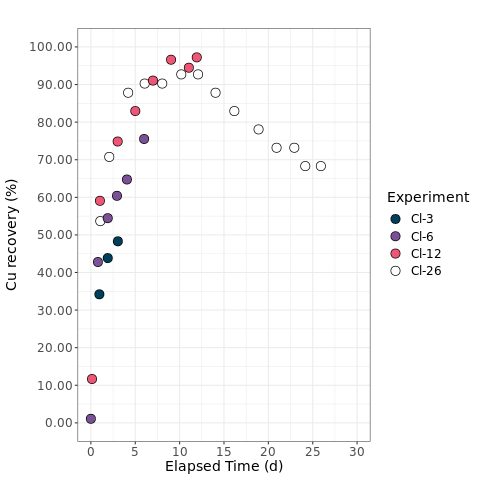

In [22]:
%%R -i recovery_melted

library(ggplot2)
library(ggpubr)
library(patchwork)

slicesAll = recovery_melted
slicesAll$short_id = factor(slicesAll$short_id, levels=c('Cl-3','Cl-6', 'Cl-12', 'Cl-26', 'SO4-3', 'SO4-6', 'SO4-12','SO4-26'))

#break functions
scaleFUN <- function(x) sprintf("%.2f", x)

equal_breaks <- function(n = 3, s = 0.05, ...){
  function(x){
    # rescaling
    d <- s * diff(range(x)) / (1+2*s)
    seq(min(x)+d, max(x)-d, length=n)
  }}
  
##################################################################################################################
# if (test_expression) {
# statement1
# } else {
# statement2
# }

plist = list()
j=1
s_units = bquote(' (mol '~ L^-1 ~')')

oxidants_to_plot = c('Ferric Chloride', 'Ferric Sulphate')
elements_to_plot = c('Cu', 'Fe')
shape = 21
k = 0
for (ox in oxidants_to_plot){
   slicesAll_temp = slicesAll[slicesAll$Oxidant == ox,]
   color_vector = c('#003f5c', '#7a5195', '#ef5675', '#ffa600')
for (element in elements_to_plot) {
   if (element == 'Fe'){
      unit_string = bquote(.(element)~'(mmol '~ L^-1 ~')')
      max_limit = 4.5
     
   }
   else{
      unit_string = paste(element, 'recovery (%)')
      max_limit = 100
         if (ox == 'Ferric Chloride'){ color_vector = c('#003f5c', '#7a5195', '#ef5675', '#FFFFFF')}
      }
   
plist[[j]] = (ggplot(slicesAll_temp[slicesAll_temp$variable == element,], aes(x = Time_elapsed_d, y= value, fill = short_id))
   + geom_point(size = 4, shape = shape+k)
   + labs(x='Elapsed Time (d)', y=unit_string, fill = 'Experiment')
   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
   + ggtitle('')
   + scale_fill_manual(drop=TRUE, values=color_vector)
   # + scale_fill_manual()
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + scale_y_continuous(breaks = scales::pretty_breaks(10), limits = c(0.0000001, max_limit),labels=scaleFUN)
   + theme_bw()
   + theme(text = element_text(size = 14), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), 
    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))

)
j = j+1
 } 
k = k+1
}
##################################################################################################################3

inset_SO4_Cu = (ggplot(slicesAll_temp[slicesAll_temp$variable == 'Cu',], aes(x = Time_elapsed_d, y= value, fill = short_id))
   + geom_point(size =2, shape = 22)
   + labs(x='', y='', fill = '')
   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
   + ggtitle('')
   + scale_fill_manual(drop=TRUE, values=c('#003f5c', '#7a5195', '#ef5675', '#ffa600'))
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(0.0000001, 60))
   + theme_bw()
   + theme(plot.background = element_rect(fill = "transparent", color = NA), text = element_text(size = 10), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(0,0,0,0, "cm"), legend.position = "none",
    axis.text = element_text(size  = 10), axis.title.y = element_text(margin = margin(t = 0, r = 0, b = 0, l = 0)))
)

inset_SO4_Fe = (ggplot(slicesAll_temp[slicesAll_temp$variable == 'Fe',], aes(x = Time_elapsed_d, y= value, fill = short_id))
   + geom_point(size =2, shape = 22)
   + labs(x='', y='', fill = '')
   + scale_x_continuous(limits=c(0, 30), breaks=seq(0,30,5))
   + ggtitle('')
   + scale_fill_manual(drop=TRUE, values=c('#003f5c', '#7a5195', '#ef5675', '#ffa600'))
   + scale_shape_manual(values=c(21, 22, 23, 24, 25))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(0.0000001, 0.5))
   + theme_bw()
   + theme(plot.background = element_rect(fill = "transparent", color = NA), text = element_text(size = 10), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(0,0,0,0, "cm"), legend.position = "none",
    axis.text = element_text(size  = 10), axis.title.y = element_text(margin = margin(t = 0, r = 0, b = 0, l = 0)))
)

# plist[[3]] =  plist[[3]] + annotation_custom(ggplotGrob(inset_SO4_Cu), xmin = 15, xmax = 31, ymin = 30, ymax = 80)
plist[[4]] =  plist[[4]] + annotation_custom(ggplotGrob(inset_SO4_Fe), xmin = 14, xmax = 30, ymin = 1.8, ymax = 5.04)


mosaic = ggarrange(ggarrange(plist[[1]], plist[[2]], ncol=1, common.legend=TRUE, legend= 'bottom', align = 'hv'), 
                  ggarrange(plist[[3]], plist[[4]], ncol=1, common.legend=TRUE, legend= 'bottom', align = 'hv'), 
                  ncol =2, labels = c('Ferric Chloride','Ferric Sulphate'))



# ggarrange(plot_curr+rremove('xlab')+rremove('x.text')+rremove('x.ticks'), 
# plot_volt+rremove('xlab')+rremove('x.text')+rremove('x.ticks'), plot_pH, plot_orp, align = 'hv',nrow=2, ncol = 2, heights = c(1,2.1)), 
# ncol=2, nrow=1, align='hv',common.legend=TRUE, widths = c(1,1.8), legend= 'right')
# aspect_ratio = 10/7
ggsave(mosaic, filename = './output/slices/recovery_time_series_separated_plot.svg', height = 7 , width = 10.5)
# ggsave(mosaic, filename = './output/slices/recovery_time_series_separated_plot.pdf', height = 7 , width = 10, device = 'pdf')

plist[[1]]

# SEM Results

In [1]:
from PIL import Image, ImageFilter, ImageEnhance
import numpy as np
from matplotlib import cm
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
list_SEM = glob.glob('./input/SEM/'+'*')
list_SEM


for image in list_SEM:
    print(image.split('.')[2])
    print('Reading image: ' + image.rstrip('.txt').lstrip('./input/SEM/'))
    if image.split('.')[2] == 'txt':
        im = np.loadtxt(image, dtype=str, delimiter = ';')
        print('size of im :' + str(im.shape))
        try:
            im = im.astype('float')
        except:
            im = im[:,:-1].astype('float')
    elif image.split('.')[2] == 'tif':
        im = Image.open(image)
        print('size of im :' + str(im.size))
   
    im = np.array(im) 
    as_ratio = im.shape[0]/im.shape[1]
    print(as_ratio)
    norm = np.linalg.norm(im)
    im = im/norm
    im = ((im - im.min()) * (1/(im.max() - im.min()) * 255)).astype('uint8')
    im = Image.fromarray(im)
    im = im.convert('RGB')
    width = 800
    height = int(800*as_ratio)
    im = im.resize((width,height), Image.ANTIALIAS)
    w, h = im.size
    deltacrop=100
    if h != 600:
        im = im.crop((0, deltacrop, w, w-100))

    if 'Cu' in image:
        matrix = (0,0,0,0, 0,0,4,0, 0,0,0,0)
    elif 'Fe' in image:
        matrix = (0,0,4,0, 0,0,2,0, 0,0,0,0)
    elif 'BSE' in image:
        matrix =  (0,1,0,0, 0,1,0,0, 0,1,0,0) 
    else: matrix = (0,0,2,0, 0,0,0,0, 0,0,0,0)
    im = im.convert('RGB',matrix)
    im = im.filter(ImageFilter.ModeFilter(2))
    enh = ImageEnhance.Brightness(im)
    enh.enhance(2)

    datas = im.getdata()
    new_image_data = []
    for item in datas:
        if item[:3]  == (0,0,0):
            new_image_data.append((16, 16, 16))
        else:
            new_image_data.append(item)
    im.putdata(new_image_data)
    # list_im.append(im)
    im.save('./output/slices/SEM/' + image.rstrip('.'+image.split('.')[2]).lstrip('./input/SEM/') + '.tif')    


# im = np.loadtxt("./input/SEM/B2_Fe.txt", dtype=str, delimiter = ';')
# im = im.astype('float')
# norm = np.linalg.norm(im)
# im = im/norm
# im = ((im - im.min()) * (1/(im.max() - im.min()) * 255)).astype('uint8')
# im = Image.fromarray(im)
# im = im.convert('RGB')

# # matrix = (0,0,2,0, 0,0,1,0, 0,0,0,0)

# im = im.convert('RGB',matrix)
# im
# enh = ImageEnhance.Brightness(im)
# enh.enhance(1)
# im.save('./output/slices/SEM/B2_Fe.tif')


txt
Reading image: A4_cc_Cu
size of im :(600, 800)
0.75
txt
Reading image: A4_cpy_Cu
size of im :(600, 800)
0.75
txt
Reading image: A2_cpy_Cu
size of im :(600, 800)
0.75
txt
Reading image: A4_cpy_S
size of im :(600, 800)
0.75
txt
Reading image: A4_cc_Fe
size of im :(600, 800)
0.75
txt
Reading image: B3_cpy_Cu
size of im :(600, 800)
0.75
txt
Reading image: A4_cc_BSE
size of im :(600, 800)
0.75
txt
Reading image: A2_cpy_BSE
size of im :(600, 800)
0.75
txt
Reading image: B1_cpy_Fe
size of im :(600, 800)
0.75
txt
Reading image: A3_cc_S
size of im :(600, 800)
0.75
txt
Reading image: B1_cpy_S
size of im :(600, 800)
0.75
txt
Reading image: B2_cpy_S
size of im :(600, 800)
0.75
txt
Reading image: A3_cc_Fe
size of im :(600, 800)
0.75
txt
Reading image: A1_cpy_BSE
size of im :(600, 800)
0.75
txt
Reading image: A2_cc_Fe
size of im :(600, 800)
0.75
txt
Reading image: A1_cpy_S
size of im :(600, 800)
0.75
txt
Reading image: B3_cpy_Fe
size of im :(600, 800)
0.75
txt
Reading image: B4_cpy_S
size of im 

In [1]:
# list_im = glob.glob('./output/slices/SEM/'+'*tif')
# def file_to_pil(filepath):
#     im = Image.open(filepath)
#     return im
# plt.figure(figsize=(15,15))
# columns = 4
# for i, image in enumerate(list_im):
#     im = file_to_pil(image)
#     plt.subplot(int(len(list_im)/columns +1), columns, i+1)
#     # print(i)
#     plt.imshow(im)
#     plt.savefig('./output/slices/SEM/test.svg')


# RAMAN Spectra 


In [2]:
import numpy as np
from matplotlib import cm
import glob
import matplotlib.pyplot as plt
import pandas as pd

## Experiments A2

In [22]:
folder = 'A2_1'
list_ramansp = glob.glob('./input/raman/'+ folder +'/*.txt')
list_ramansp

sp_df = pd.DataFrame(columns = ['x', 'y','filename'])
for sp_file in list_ramansp:
    sp = np.loadtxt(sp_file)
    sp = pd.DataFrame(sp, columns = ['x', 'y'])
    sp['filename'] = sp_file.lstrip('./input/raman/'+folder+'/').rstrip('.txt').replace('_', ' ')
    sp_df = sp_df.append(sp, ignore_index=True)

sp_df = sp_df.dropna()
sp_df

,x,y,filename
0,-135.833647,0.046301,cpy
1,-132.803997,0.070933,cpy
2,-129.775362,0.097030,cpy
3,-126.747741,0.116676,cpy
4,-123.721135,0.119226,cpy
...,...,...,...
11195,3665.859110,-0.634949,std sulphur
11196,3667.726051,2.439941,std sulphur
11197,3669.592476,0.811096,std sulphur
11198,3671.458384,0.108887,std sulphur


In [23]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


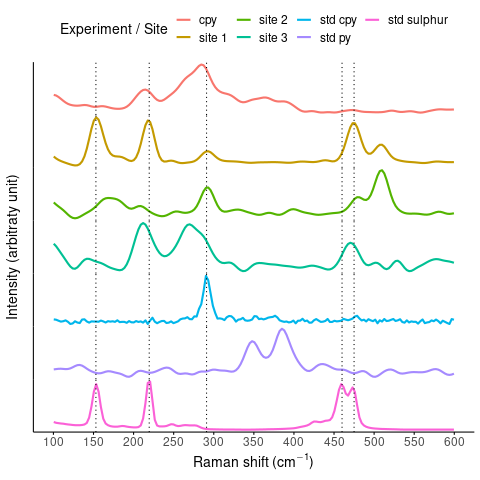

In [49]:
%%R -i sp_df

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 100
xmax = 600

sp_df_to_plot = subset(sp_df, x <= xmax & x >= xmin)

raman_sp_plot = (ggplot(sp_df_to_plot, aes(x = x, y= y*10, color = filename)) 
   + geom_line(size =1)
   + facet_wrap(~filename, ncol=1, scales = 'free_y')
   + labs(x=bquote('Raman shift'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site')
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,600,50))
   + geom_vline(xintercept =153, linetype  = 'dotted')
   + geom_vline(xintercept =291, linetype  = 'dotted')
   + geom_vline(xintercept =219.5, linetype  = 'dotted')
   + geom_vline(xintercept =460, linetype  = 'dotted')
   + geom_vline(xintercept =475, linetype  = 'dotted')
   + scale_y_continuous(breaks = scales::pretty_breaks(10), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 14), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'top',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_sp_plot, filename = './output/slices/raman/A2_raman_sp_1.svg', height = 10 , width = 10)
ggsave(raman_sp_plot, filename = './output/slices/raman/A2_raman_sp_1.pdf', height = 10 , width = 10)

raman_sp_plot

In [2]:
folder = 'A2_2'
list_ramansp = glob.glob('./input/raman/'+ folder +'/*.txt')
list_ramansp

sp_df = pd.DataFrame(columns = ['x', 'y','filename'])
for sp_file in list_ramansp:
    sp = np.loadtxt(sp_file)
    sp = pd.DataFrame(sp, columns = ['x', 'y'])
    sp['filename'] = sp_file.lstrip('./input/raman/'+folder+'/').rstrip('.txt').replace('_', ' ')
    sp_df = sp_df.append(sp, ignore_index=True)

sp_df = sp_df.dropna()
sp_df

,x,y,filename
0,-135.833647,-0.257141,std cpy
1,-132.803997,0.550354,std cpy
2,-129.775362,-0.240967,std cpy
3,-126.747741,-0.431213,std cpy
4,-123.721135,0.279846,std cpy
...,...,...,...
11195,3665.859110,-3.110352,site 3
11196,3667.726051,1.844055,site 3
11197,3669.592476,-6.199890,site 3
11198,3671.458384,0.757690,site 3


In [3]:
import rpy2
%load_ext rpy2.ipython

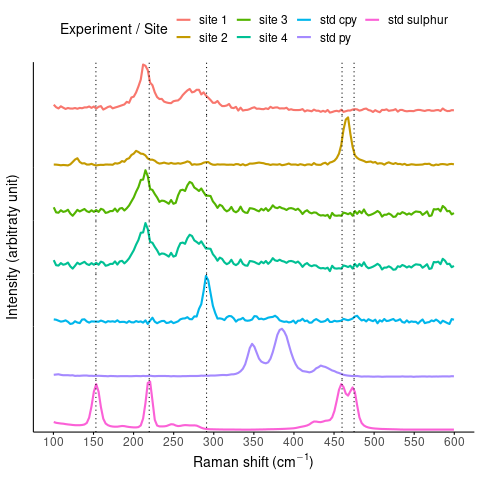

In [52]:
%%R -i sp_df

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 100
xmax = 600

sp_df_to_plot = subset(sp_df, x <= xmax & x >= xmin)

raman_sp_plot = (ggplot(sp_df_to_plot, aes(x = x, y= y*10, color = filename)) 
   + geom_line(size =1)
   + facet_wrap(~filename, ncol=1, scales = 'free_y')
   + labs(x=bquote('Raman shift'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site')
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,600,50))
   + geom_vline(xintercept =153, linetype  = 'dotted')
   + geom_vline(xintercept =291, linetype  = 'dotted')
   + geom_vline(xintercept =219.5, linetype  = 'dotted')
   + geom_vline(xintercept =460, linetype  = 'dotted')
   + geom_vline(xintercept =475, linetype  = 'dotted')
   + scale_y_continuous(breaks = scales::pretty_breaks(10), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 14), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'top',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_sp_plot, filename = './output/slices/raman/A2_raman_sp_2.svg', height = 10 , width = 10)
ggsave(raman_sp_plot, filename = './output/slices/raman/A2_raman_sp_2.pdf', height = 10 , width = 10)

raman_sp_plot

## Paper Figure v1

All secondary phases

Standards:

- cpy (from unleached samples)
- synthetic sulphur
- pyrite (from unleached sample)
- sulphur standard RUFF https://rruff.info/sulphur/display=default/R040135 R040135.2
- covellite std RUFF R060129

Samples: 

- Secondary layer (sulphurish) B3 (B27S8) site 1
- Secondary layer (sulphurish) A3 (B24S2) site 4a
- Secondary layer (sulphurish) A2 (B24S5) site 3 spectra 4
- Secondary layer (sulphurish) A2 (B24S5) ex2: site 2 spectra seclayer
- Secondary layer (sulphurish) A2 (B24S5) ex3: site 2 spectra sulphur
- Covellite A1 (B24S7) site 6 spectra 1
- leached chalcopyrite A2: site 5 spectra 2
- leached chalcopyrite A1: site 5 spectra 2

In [10]:
folder = 'paperv1'
list_ramansp = glob.glob('./input/raman/'+ folder +'/*.txt')
print(list_ramansp)

sp_df = pd.DataFrame(columns = ['x', 'y','filename'])
for sp_file in list_ramansp:
    sp = np.loadtxt(sp_file)
    sp = pd.DataFrame(sp, columns = ['x', 'y'])
    sp['filename'] = sp_file.rstrip('.txt').replace('_', ' ').replace('./input/raman/'+folder+'/','')
    sp_df = sp_df.append(sp, ignore_index=True)
    
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

exp_desc_dict = {
    'secondary covellite A1': 'A1 (3 days, '+'FeCl3)'.translate(subscript),
    'std covellite rruff': 'Covellite standard from RRUFF',
    'std K-jarosite rruff': 'Jarosite standard from RRUFF',
    'std sulphur': 'Sulphur standard prepared in the lab',
    'std sulphur rruff': 'Sulphur standard from RRUFF',
    'sulphur A2' : 'A2 (6 days, '+'FeCl3) ex.'.translate(subscript) + ' 1',
    'B24S2 4 sp a' : 'A3 (12 days, '+'FeCl3)'.translate(subscript),
    'sulphur B3' : 'B3 (12 days, '+'Fe2(SO4)3)'.translate(subscript),
    'leached chalcopyrite A2': 'Chalcopyrite (leached) in A2 (6 days, '+'FeCl3)'.translate(subscript),
    'unleached cpy': 'Unleached Chalcopyrite',
    '5 sp 1':'5 sp 1',
    '5 sp 3':'5 sp 3',
    '5 sp 4':'5 sp 4',
    '3 sp 3' : '3 sp 3',
    'A1 cpy': 'A1 cpy',
    'leached chalcopyrite A1': 'Chalcopyrite (leached) in A1 (3 days, '+'FeCl3)'.translate(subscript),
    'sulphur A2 ex2': 'A2 (6 days, '+'FeCl3) ex.'.translate(subscript) +' 2',
    'sulphur A2 ex3': 'A2 (6 days, '+'FeCl3) ex.'.translate(subscript)+' 3'
}

sp_df['exp_desc'] = sp_df['filename'].map(exp_desc_dict)

sp_df = sp_df.dropna()
sp_df

['./input/raman/paperv1/sulphur_A2.txt', './input/raman/paperv1/B24S2_4_sp_a.txt', './input/raman/paperv1/secondary_covellite_A1.txt', './input/raman/paperv1/sulphur_A2_ex3.txt', './input/raman/paperv1/sulphur_A2_ex2.txt', './input/raman/paperv1/sulphur_B3.txt']


,x,y,filename,exp_desc
0,-135.833647,1.285706,sulphur A2,"A2 (6 days, FeCl₃) ex. 1"
1,-132.803997,-0.739563,sulphur A2,"A2 (6 days, FeCl₃) ex. 1"
2,-129.775362,-0.763184,sulphur A2,"A2 (6 days, FeCl₃) ex. 1"
3,-126.747741,-0.785095,sulphur A2,"A2 (6 days, FeCl₃) ex. 1"
4,-123.721135,1.191956,sulphur A2,"A2 (6 days, FeCl₃) ex. 1"
...,...,...,...,...
9595,3665.859110,52.620636,sulphur B3,"B3 (12 days, Fe₂(SO₄)₃)"
9596,3667.726051,46.649963,sulphur B3,"B3 (12 days, Fe₂(SO₄)₃)"
9597,3669.592476,50.020233,sulphur B3,"B3 (12 days, Fe₂(SO₄)₃)"
9598,3671.458384,26.852995,sulphur B3,"B3 (12 days, Fe₂(SO₄)₃)"


In [11]:
import rpy2
%load_ext rpy2.ipython

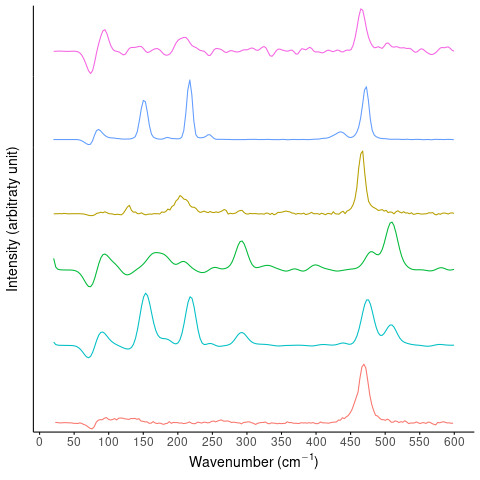

In [13]:
%%R -i sp_df

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 20
xmax = 600

sp_df_to_plot = subset(sp_df, x <= xmax & x >= xmin)

sp_df_to_plot$filename = factor(sp_df_to_plot$filename, levels=c('sulphur B3', 'B24S2 4 sp a', 'sulphur A2', 'sulphur A2 ex2', 'sulphur A2 ex3', 'leached chalcopyrite A1',
'leached chalcopyrite A2', 'secondary covellite A1', 'std sulphur rruff', 'std K-jarosite rruff','std sulphur', 'std covellite', 'unleached cpy'))


raman_sp_plot = (ggplot(sp_df_to_plot, aes(x = x, y= y, color = exp_desc)) 
   + geom_line(size =0.5)
   + facet_wrap(~filename, ncol=1, scales = 'free_y')
   + labs(x=bquote('Wavenumber'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site')
   + geom_text(size =4, color = 'Black', data = sp_df_to_plot, mapping = aes(x = Inf, y = Inf, label  = exp_desc, hjust = 'right', vjust = 14), show.legend = FALSE, check_overlap = TRUE)
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,50))
#    + geom_vline(xintercept =93, linetype  = 'dotted')
#    + geom_vline(xintercept =130, linetype  = 'dotted')

   # + annotate(data = sp_df_to_plot, "text", x=153, y=4.5, label = exp_desc)

   + scale_y_continuous(breaks = scales::pretty_breaks(10), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 14), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'none',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_sp_plot, filename = './output/slices/raman/raman_paper_v1.svg', height = 11 , width = 8)
# ggsave(raman_sp_plot, filename = './output/slices/raman/raman_paper_v1.pdf', height = 11 , width = 8)

raman_sp_plot

## Standards

In [8]:
folder = 'stds'
list_ramansp = glob.glob('./input/raman/'+ folder +'/*.txt')
print(list_ramansp)

sp_df = pd.DataFrame(columns = ['x', 'y','filename'])
for sp_file in list_ramansp:
    sp = np.loadtxt(sp_file)
    sp = pd.DataFrame(sp, columns = ['x', 'y'])
    sp['filename'] = sp_file.rstrip('.txt').replace('_', ' ').replace('./input/raman/'+folder+'/','')
    sp_df = sp_df.append(sp, ignore_index=True)
    
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

exp_desc_dict = {
    'secondary covellite A1': 'Covellite in A1 (3 days, '+'FeCl3]'.translate(subscript),
    'std covellite rruff': 'Covellite (RRUFF R060129)',
    'std K-jarosite rruff': 'Jarosite standard (RRUFF)',
    'std sulphur': 'Sulphur (lab)',
    'std sulphur rruff': 'Sulphur (RRUFF R040135)',
    'sulphur A2' : 'Secondary Layer in A2 (6 days, '+'FeCl3)'.translate(subscript),
    'sulphur A3' : 'Secondary Layer in A3 (12 days, '+'FeCl3)'.translate(subscript),
    'sulphur B3' : 'Secondary Layer in B3 (12 days, '+'Fe2(SO4)3)'.translate(subscript),
    'leached chalcopyrite A2': 'Chalcopyrite (leached) in A2 (6 days, '+'FeCl3)'.translate(subscript),
    'unleached cpy': 'Chalcopyrite (unleached sample)',
    '5 sp 1':'5 sp 1',
    '5 sp 3':'5 sp 3',
    '5 sp 4':'5 sp 4',
    '3 sp 3' : '3 sp 3',
    'A1 cpy': 'A1 cpy',
    'leached chalcopyrite A1': 'Chalcopyrite (leached) in A1 (3 days, '+'FeCl3)'.translate(subscript),
    'sulphur A2 ex2': 'Secondary layer in A2 (6 days, '+'FeCl3) example'.translate(subscript) +' 2',
    'sulphur A2 ex3': 'Secondary layer in A2 (6 days, '+'FeCl3) example'.translate(subscript)+' 3'
}

sp_df['exp_desc'] = sp_df['filename'].map(exp_desc_dict)

sp_df = sp_df.dropna()
sp_df

['./input/raman/stds/std_covellite_rruff.txt', './input/raman/stds/std_sulphur_rruff.txt', './input/raman/stds/unleached_cpy.txt']


,x,y,filename,exp_desc
0,135.100600,0.000000,std covellite rruff,Covellite (RRUFF R060129)
1,135.582700,0.216930,std covellite rruff,Covellite (RRUFF R060129)
2,136.064800,0.833401,std covellite rruff,Covellite (RRUFF R060129)
3,136.546900,1.729599,std covellite rruff,Covellite (RRUFF R060129)
4,137.029100,3.373165,std covellite rruff,Covellite (RRUFF R060129)
...,...,...,...,...
6470,3665.859110,1.218201,unleached cpy,Chalcopyrite (unleached sample)
6471,3667.726051,0.712402,unleached cpy,Chalcopyrite (unleached sample)
6472,3669.592476,0.400024,unleached cpy,Chalcopyrite (unleached sample)
6473,3671.458384,-1.120605,unleached cpy,Chalcopyrite (unleached sample)


In [9]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


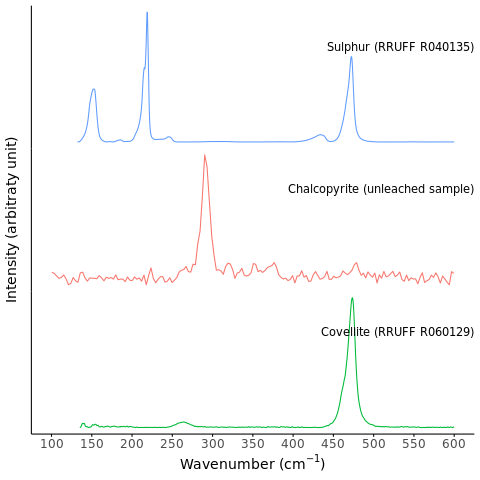

In [12]:
%%R -i sp_df

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 100
xmax = 600

sp_df_to_plot = subset(sp_df, x <= xmax & x >= xmin)

sp_df_to_plot$filename = factor(sp_df_to_plot$filename, levels=c('sulphur A2 ex2', 'sulphur A2 ex3', 'leached chalcopyrite A1','leached chalcopyrite A2','sulphur B3', 'sulphur A3', 'sulphur A2',
'secondary covellite A1', 'std sulphur rruff', 'std K-jarosite rruff','std sulphur', 'std covellite', 'unleached cpy'))



# levels(sp_df_to_plot$filename) = c('std cpy','std std covellite','std sulphur', 'std sulphur rruff',
# 'secondary covellite A1 coating cpy', 'secondary covellite A1 standalone',
# 'sulphur A2','sulphur A3', 'sulphur B3')


raman_sp_plot = (ggplot(sp_df_to_plot, aes(x = x, y= y, color = exp_desc)) 
   + geom_line(size =0.5)
   + facet_wrap(~filename, ncol=1, scales = 'free_y')
   + labs(x=bquote('Wavenumber'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site')
   + geom_text(size =4, color = 'Black', data = sp_df_to_plot, mapping = aes(x = Inf, y = Inf, label  = exp_desc, hjust = 'right', vjust = 5), show.legend = FALSE, check_overlap = TRUE)
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,50))
   # + geom_vline(xintercept =90, linetype  = 'dotted')
#    + annotate("segment", x = 153, y = 5, xend = 10, yend = 10, 
#    arrow = arrow(type = "closed", length = unit(0.02, "cm")))
#    + geom_vline(xintercept =153, linetype  = 'dotted')
# #    + annotate("text", x=153, y=4.5, label = '153')
# # #    + geom_text(aes(x=153, label='153', y=20), check_overlap = TRUE, angle = 90, color = 'black')
#    + geom_vline(xintercept =291, linetype  = 'dotted')
#    + geom_vline(xintercept =219.5, linetype  = 'dotted')
# #    + geom_vline(xintercept =200, linetype  = 'dotted')
#    + geom_vline(xintercept =265, linetype  = 'dotted')
# #    # + geom_vline(xintercept =315, linetype  = 'dotted')
# #    # + geom_vline(xintercept =390, linetype  = 'dotted')
#    + geom_vline(xintercept =474, linetype  = 'dotted')
#    + geom_vline(xintercept =460, linetype  = 'dotted')
# #    + geom_vline(xintercept =509, linetype  = 'dotted')
#    + geom_vline(xintercept =1600, linetype  = 'dotted')
#    + geom_vline(xintercept =1350, linetype  = 'dotted')
   + scale_y_continuous(breaks = scales::pretty_breaks(10), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 14), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'none',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_sp_plot, filename = './output/slices/raman/raman_paper_stds.svg', height = 9 , width = 7)
ggsave(raman_sp_plot, filename = './output/slices/raman/raman_paper_stds.pdf', height = 9 , width = 7)

raman_sp_plot

## Deconvolution

### Secondary Layer in A2 (6 days, FeCl₃)

In [452]:
deconv = np.loadtxt('./input/raman/deconv/sulphur_A2_deconv.dat')
deconv_df = pd.DataFrame(deconv)
deconv_df.rename(columns = {0:'x', 1:'y'}, inplace = True)
deconv_df

# , columns = ['x', 'y', 'std_dev','active','model','res']

,x,y,2,3,4,5,6,7,8,9,10,11,12,13,14
0,118.110,-12.0576,0.000000e+00,0.000000e+00,3.851180e-24,0.210824,0.00000,5.574900e-19,0.0,0.000000,0.0,0.0,0.000000e+00,0.0,0.210824
1,121.055,3.4881,0.000000e+00,0.000000e+00,2.212270e-22,3.584610,0.00000,9.000030e-18,0.0,0.000000,0.0,0.0,2.499980e-44,0.0,3.584610
2,123.999,36.1091,0.000000e+00,0.000000e+00,1.098570e-20,25.198400,0.00000,1.332140e-16,0.0,0.000000,0.0,0.0,3.049980e-42,0.0,25.198400
3,126.942,70.7788,0.000000e+00,0.000000e+00,4.716560e-19,73.298300,0.00000,1.807980e-15,0.0,0.000000,0.0,0.0,2.999730e-40,0.0,73.298300
4,129.884,89.4834,0.000000e+00,0.000000e+00,1.751020e-17,88.305000,0.00000,2.250140e-14,0.0,0.000000,0.0,0.0,2.648430e-38,0.0,88.305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,487.305,50.4691,4.807250e-02,1.023070e-14,0.000000e+00,0.000000,47.10300,0.000000e+00,0.0,0.689685,0.0,0.0,0.000000e+00,0.0,47.840800
129,490.129,34.3711,3.373980e-03,2.254920e-17,0.000000e+00,0.000000,29.59990,0.000000e+00,0.0,6.044230,0.0,0.0,0.000000e+00,0.0,35.647500
130,492.952,39.2766,1.710930e-04,3.096700e-20,0.000000e+00,0.000000,15.77750,0.000000e+00,0.0,22.691200,0.0,0.0,0.000000e+00,0.0,38.468900
131,495.774,43.1852,6.270550e-06,2.651050e-23,0.000000e+00,0.000000,7.13461,0.000000e+00,0.0,36.522500,0.0,0.0,0.000000e+00,0.0,43.657100


In [453]:
# deconv_df = deconv_df[deconv_df['active'] == 1]
deconv_df_melted = pd.melt(deconv_df, id_vars = ['x','y'])
deconv_df_melted.columns = ['x', 'y','model', 'value']
deconv_df_melted

,x,y,model,value
0,118.110,-12.0576,2,0.0000
1,121.055,3.4881,2,0.0000
2,123.999,36.1091,2,0.0000
3,126.942,70.7788,2,0.0000
4,129.884,89.4834,2,0.0000
...,...,...,...,...
1724,487.305,50.4691,14,47.8408
1725,490.129,34.3711,14,35.6475
1726,492.952,39.2766,14,38.4689
1727,495.774,43.1852,14,43.6571


In [454]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


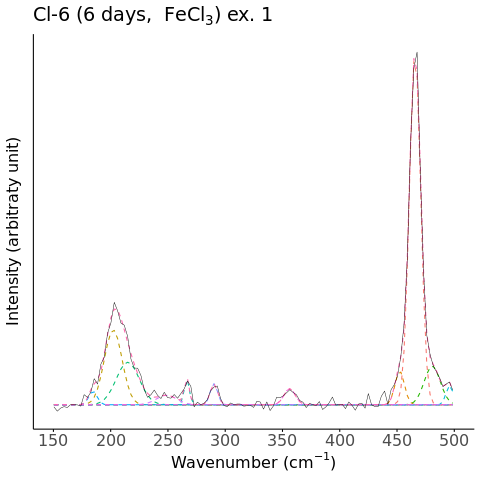

In [456]:
%%R -i deconv_df_melted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 150
xmax = 500

deconv_df_to_plot = subset(deconv_df_melted, x <= xmax & x >= xmin)



raman_deconv_plot = (ggplot(deconv_df_to_plot, aes(x = x, y= value, color = factor(model))) 
   + geom_line(size =0.5, linetype  = 'dashed')
   + geom_line(data = deconv_df_to_plot, aes(x = x, y= y), color= 'black', size = 0.2)
   # + facet_wrap(~model, ncol=1, scales = 'free_y')
   + labs(x=bquote('Wavenumber'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site', title = bquote('Cl-6 (6 days, '~''*FeCl[3]*') ex. 1'))

#    + geom_text(size =4, color = 'Black', data = sp_df_to_plot, mapping = aes(x = Inf, y = Inf, label  = exp_desc, hjust = 'right', vjust = 5), show.legend = FALSE, check_overlap = TRUE)
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,50))
   # + geom_vline(xintercept =90, linetype  = 'dotted')
#    + geom_vline(xintercept =130, linetype  = 'dotted')
# # #    + geom_text(aes(x=153, label='153', y=20), check_overlap = TRUE, angle = 90, color = 'black')
#    + geom_vline(xintercept =291, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =204, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =215, linetype  = 'dotted', color = 'grey')
#    # + geom_vline(xintercept =224, linetype  = 'dotted')
#    + geom_vline(xintercept =267, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =185, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =480, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =467, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =453, linetype  = 'dotted', color = 'grey')
#    + annotate("text", x=267, y=500, label = '267', angle = 90)
#    + annotate("text", x=291, y=500, label = '291', angle = 90)
#    # + annotate("text", x=224, y=100, label = '224')
#    + annotate("text", x=215, y=500, label = '215', angle = 90)
#    + annotate("text", x=204, y=500, label = '204', angle = 90)
#    + annotate("text", x=130, y=500, label = '130', angle = 90)
#    + annotate("text", x=480, y=700, label = '480', angle = 90)
#    + annotate("text", x=467, y=700, label = '467', angle = 90)
#    + annotate("text", x=453, y=700, label = '453', angle = 90)
#    + annotate("text", x=185, y=500, label = '185', angle = 90)

   # + scale_color_brewer(palette="Dark2")

   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 16), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'none',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 16), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_A2_deconv.svg', height = 5 , width = 8)
ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_A2_deconv.pdf', height = 5 , width = 8)

raman_deconv_plot

### Secondary layer in A2 (6 days, FeCl₃) example 2

In [457]:
deconv = np.loadtxt('./input/raman/deconv/sulphur_A2_ex2_deconv_v2.dat')
deconv_df = pd.DataFrame(deconv)
deconv_df.rename(columns = {0:'x', 1:'y'}, inplace = True)
deconv_df


,x,y,2,3,4,5,6,7,8,9,10,11
0,-135.834,-124.197,0.001060,0.018340,0.001847,1.663250e-10,6.137190e-09,0.002000,0.002025,5.983970e-09,1.392380e-07,0.025272
1,-132.804,-119.845,0.001070,0.018603,0.001865,1.696670e-10,6.246590e-09,0.002023,0.002052,6.078210e-09,1.409270e-07,0.025612
2,-129.775,-115.567,0.001080,0.018871,0.001884,1.731090e-10,6.358910e-09,0.002046,0.002079,6.174660e-09,1.426470e-07,0.025960
3,-126.748,-111.372,0.001090,0.019145,0.001903,1.766570e-10,6.474240e-09,0.002070,0.002106,6.273400e-09,1.443970e-07,0.026314
4,-123.721,-107.282,0.001100,0.019425,0.001922,1.803130e-10,6.592700e-09,0.002094,0.002134,6.374490e-09,1.461790e-07,0.026675
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3665.860,-14086.100,0.000044,0.000295,0.000069,1.284390e-12,6.105150e-11,0.000054,0.000040,7.795060e-11,3.254650e-09,0.000501
1596,3667.730,-14110.900,0.000044,0.000294,0.000069,1.283020e-12,6.098570e-11,0.000054,0.000040,7.786540e-11,3.250970e-09,0.000501
1597,3669.590,-14136.200,0.000044,0.000294,0.000069,1.281650e-12,6.091990e-11,0.000054,0.000040,7.778030e-11,3.247290e-09,0.000500
1598,3671.460,-14161.700,0.000044,0.000294,0.000069,1.280280e-12,6.085420e-11,0.000054,0.000040,7.769540e-11,3.243620e-09,0.000500


In [458]:
# deconv_df = deconv_df[deconv_df['active'] == 1]
deconv_df_melted = pd.melt(deconv_df, id_vars = ['x','y'])
deconv_df_melted.columns = ['x', 'y','model', 'value']
deconv_df_melted

,x,y,model,value
0,-135.834,-124.197,2,0.001060
1,-132.804,-119.845,2,0.001070
2,-129.775,-115.567,2,0.001080
3,-126.748,-111.372,2,0.001090
4,-123.721,-107.282,2,0.001100
...,...,...,...,...
15995,3665.860,-14086.100,11,0.000501
15996,3667.730,-14110.900,11,0.000501
15997,3669.590,-14136.200,11,0.000500
15998,3671.460,-14161.700,11,0.000500


In [459]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


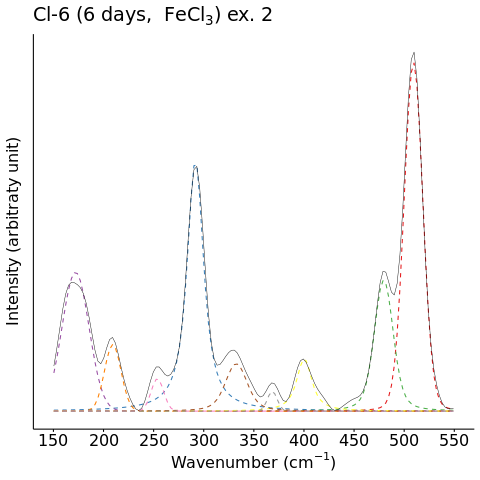

In [461]:
%%R -i deconv_df_melted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 150
xmax = 550

deconv_df_to_plot = subset(deconv_df_melted, x <= xmax & x >= xmin)



raman_deconv_plot = (ggplot(deconv_df_to_plot, aes(x = x, y= value, color = factor(model))) 
   + geom_line(size =0.5, linetype  = 'dashed')
   + geom_line(data = deconv_df_to_plot, aes(x = x, y= y), color= 'black', size = 0.2)
   + labs(x=bquote('Wavenumber'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site', title = bquote('Cl-6 (6 days, '~''*FeCl[3]*') ex. 2'))
#    + geom_text(size =4, color = 'Black', data = sp_df_to_plot, mapping = aes(x = Inf, y = Inf, label  = exp_desc, hjust = 'right', vjust = 5), show.legend = FALSE, check_overlap = TRUE)
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,50))
   # + geom_vline(xintercept =90, linetype  = 'dotted')
   # + geom_vline(xintercept =130, linetype  = 'dotted')
# #    + geom_text(aes(x=153, label='153', y=20), check_overlap = TRUE, angle = 90, color = 'black')
   # + geom_vline(xintercept =291, linetype  = 'dotted', color = 'grey')
   # # + geom_vline(xintercept =204, linetype  = 'dotted')
   # + geom_vline(xintercept =208, linetype  = 'dotted', color = 'grey')
   # # + geom_vline(xintercept =224, linetype  = 'dotted')
   # # + geom_vline(xintercept =260, linetype  = 'dotted')
   # + geom_vline(xintercept =330, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =170, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =480, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =400, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =509, linetype  = 'dotted', color = 'grey')
   # # + annotate("text", x=260, y=100, label = '260')
   # + annotate("text", x=291, y=50, label = '291', angle = 90)
   # # + annotate("text", x=224, y=100, label = '224')
   # + annotate("text", x=208, y=50, label = '208', angle = 90)
   # # + annotate("text", x=204, y=140, label = '204')
   # # + annotate("text", x=130, y=100, label = '130')
   # + annotate("text", x=330, y=50, label = '330', angle = 90)
   # + annotate("text", x=480, y=50, label = '480', angle = 90)
   # + annotate("text", x=400, y=50, label = '400', angle = 90)
   # + annotate("text", x=509, y=30, label = '509', angle = 90)
   # + annotate("text", x=170, y=50, label = '170', angle = 90)

   + scale_color_brewer(palette="Set1")

   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 16), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'none',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 16, color='black'), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_A2_ex2_deconv.svg', height = 5 , width = 8)
# ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_A2_ex2_deconv.pdf', height = 5 , width = 8)

raman_deconv_plot

### Secondary layer in A2 (6 days, FeCl₃) example 3

In [462]:
deconv = np.loadtxt('./input/raman/deconv/sulphur_A2_ex3_deconv.dat')
deconv_df = pd.DataFrame(deconv)
deconv_df.rename(columns = {0:'x', 1:'y'}, inplace = True)
deconv_df
deconv_df_melted = pd.melt(deconv_df, id_vars = ['x','y'])
deconv_df_melted.columns = ['x', 'y','model', 'value']
deconv_df_melted

,x,y,model,value
0,-135.834,0.081756,2,0.001241
1,-132.804,0.103248,2,0.001253
2,-129.775,0.110916,2,0.001265
3,-126.748,0.103275,2,0.001277
4,-123.721,0.078876,2,0.001289
...,...,...,...,...
919,543.609,1.821810,7,0.002515
920,546.414,1.059050,7,0.002477
921,549.219,0.291508,7,0.002439
922,552.023,-0.656506,7,0.002403


In [463]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


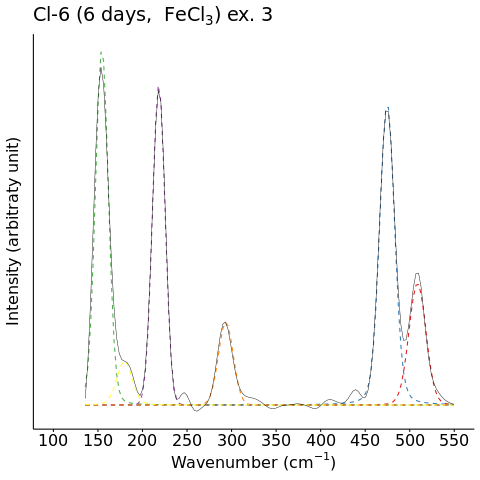

In [465]:
%%R -i deconv_df_melted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 100
xmax = 550

deconv_df_to_plot = subset(deconv_df_melted, x <= xmax & x >= xmin)



raman_deconv_plot = (ggplot(deconv_df_to_plot, aes(x = x, y= value, color = factor(model))) 
   + geom_line(size =0.5, linetype  = 'dashed')
   + geom_line(data = deconv_df_to_plot, aes(x = x, y= y), color= 'black', size = 0.2)
   + labs(x=bquote('Wavenumber'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site', title = bquote('Cl-6 (6 days, '~''*FeCl[3]*') ex. 3'))
#    + geom_text(size =4, color = 'Black', data = sp_df_to_plot, mapping = aes(x = Inf, y = Inf, label  = exp_desc, hjust = 'right', vjust = 5), show.legend = FALSE, check_overlap = TRUE)
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,50))
   # + geom_vline(xintercept =90, linetype  = 'dotted')
#    # + geom_vline(xintercept =130, linetype  = 'dotted')
# # #    + geom_text(aes(x=153, label='153', y=20), check_overlap = TRUE, angle = 90, color = 'black')
#    + geom_vline(xintercept =291, linetype  = 'dotted', color = 'grey')
#    # + geom_vline(xintercept =204, linetype  = 'dotted')
#    + geom_vline(xintercept =219, linetype  = 'dotted', color = 'grey')
#    # + geom_vline(xintercept =224, linetype  = 'dotted')
#    # + geom_vline(xintercept =260, linetype  = 'dotted')
#    + geom_vline(xintercept =153, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =475, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =180, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =510, linetype  = 'dotted', color = 'grey')
#    # + annotate("text", x=260, y=100, label = '260')
#    + annotate("text", x=291, y=100, label = '291', angle = 90)
#    # + annotate("text", x=224, y=100, label = '224')
#    + annotate("text", x=219, y=50, label = '219', angle = 90)
#    # + annotate("text", x=204, y=140, label = '204')
#    # + annotate("text", x=130, y=100, label = '130')
#    + annotate("text", x=475, y=50, label = '475', angle = 90)
#    + annotate("text", x=180, y=50, label = '180', angle = 90)
#    + annotate("text", x=510, y=30, label = '510', angle = 90)
#    + annotate("text", x=153, y=50, label = '153', angle = 90)

   + scale_color_brewer(palette="Set1")

   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 16), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'none',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 16, color='black'), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_A2_ex3_deconv.svg', height = 5 , width = 8)
ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_A2_ex3_deconv.pdf', height = 5 , width = 8)

raman_deconv_plot

### Secondary covellite in A1 (3 days, FeCl3)

In [466]:
deconv = np.loadtxt('./input/raman/deconv/secondary_covellite_A1_deconv.dat')
deconv_df = pd.DataFrame(deconv)
deconv_df.rename(columns = {0:'x', 1:'y'}, inplace = True)
deconv_df
deconv_df_melted = pd.melt(deconv_df, id_vars = ['x','y'])
deconv_df_melted.columns = ['x', 'y','model', 'value']
deconv_df_melted

,x,y,model,value
0,-650.104,0.685730,2,5.012700e-09
1,-646.902,0.337463,2,5.041500e-09
2,-643.701,-0.354553,2,5.070540e-09
3,-640.502,0.255005,2,5.099810e-09
4,-637.304,-1.034000,2,5.129340e-09
...,...,...,...,...
735,486.173,26.606400,6,2.249180e-07
736,488.993,24.201400,6,2.193020e-07
737,491.813,16.997800,6,2.138950e-07
738,494.632,11.895700,6,2.086880e-07


In [467]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


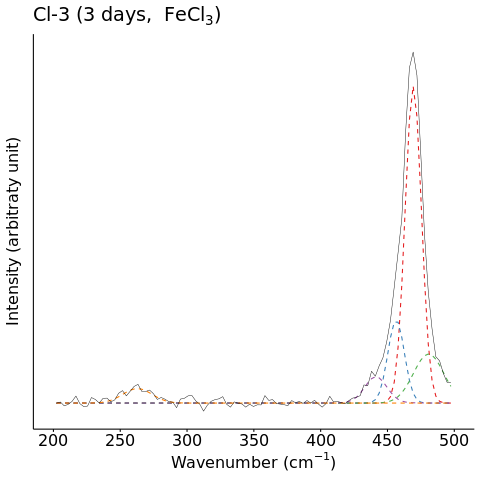

In [468]:
%%R -i deconv_df_melted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 200
xmax = 500

deconv_df_to_plot = subset(deconv_df_melted, x <= xmax & x >= xmin)



raman_deconv_plot = (ggplot(deconv_df_to_plot, aes(x = x, y= value, color = factor(model))) 
   + geom_line(size =0.5, linetype  = 'dashed')
   + geom_line(data = deconv_df_to_plot, aes(x = x, y= y), color= 'black', size = 0.2)
   + labs(x=bquote('Wavenumber'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site', title = bquote('Cl-3 (3 days, '~''*FeCl[3]*')'))
#    + geom_text(size =4, color = 'Black', data = sp_df_to_plot, mapping = aes(x = Inf, y = Inf, label  = exp_desc, hjust = 'right', vjust = 5), show.legend = FALSE, check_overlap = TRUE)
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,50))
#    # + geom_vline(xintercept =90, linetype  = 'dotted')
#    # + geom_vline(xintercept =130, linetype  = 'dotted')
# # #    + geom_text(aes(x=153, label='153', y=20), check_overlap = TRUE, angle = 90, color = 'black')
#    + geom_vline(xintercept =291, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =440, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =219, linetype  = 'dotted')
#    + geom_vline(xintercept =456, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =480, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =265, linetype  = 'dotted', color = 'grey')
#    + geom_vline(xintercept =470, linetype  = 'dotted', color = 'grey')
# #    + geom_vline(xintercept =180, linetype  = 'dotted')
#    + geom_vline(xintercept =510, linetype  = 'dotted', color = 'grey')
#    + annotate("text", x=480, y=210, label = '480',angle = 90)
#    + annotate("text", x=291, y=50, label = '291', angle = 90)
#    + annotate("text", x=456, y=210, label = '456',angle = 90)
# #    + annotate("text", x=219, y=50, label = '219', angle = 90)
#    + annotate("text", x=440, y=210, label = '440',angle = 90)
#    # + annotate("text", x=130, y=100, label = '130')
#    + annotate("text", x=470, y=210, label = '470', angle = 90)
# #    + annotate("text", x=180, y=50, label = '180', angle = 90)
# #    + annotate("text", x=510, y=30, label = '510', angle = 90)
#    + annotate("text", x=265, y=50, label = '265', angle = 90)

   + scale_color_brewer(palette="Set1")

   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 16), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'none',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 16, color='black'), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_A1_sec_cov_deconv.svg', height = 5 , width = 8)
ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_A1_sec_cov_deconv.pdf', height = 5 , width = 8)

raman_deconv_plot

### Secondary layer in B3 (12 days, Fe2(SO4)3)

In [469]:
deconv = np.loadtxt('./input/raman/deconv/sulphur_B3_deconv_v2.dat')
deconv_df = pd.DataFrame(deconv)
deconv_df.rename(columns = {0:'x', 1:'y'}, inplace = True)
deconv_df
deconv_df_melted = pd.melt(deconv_df, id_vars = ['x','y'])
deconv_df_melted.columns = ['x', 'y','model', 'value']
# deconv_df_melted = deconv_df_melted[deconv_df_melted['value'] > 0.1]
deconv_df_melted

,x,y,model,value
0,-135.834,3699.61,2,0.000152
1,-132.804,3550.95,2,0.000155
2,-129.775,3405.98,2,0.000157
3,-126.748,3265.18,2,0.000160
4,-123.721,3128.06,2,0.000163
...,...,...,...,...
19195,3665.860,6419780.00,13,0.001092
19196,3667.730,6431100.00,13,0.001090
19197,3669.590,6442430.00,13,0.001089
19198,3671.460,6453760.00,13,0.001088


In [470]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


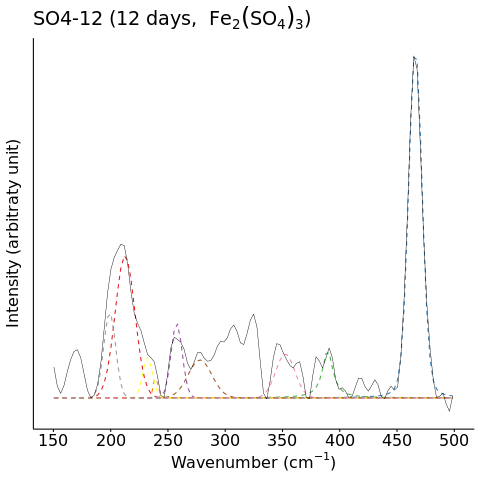

In [471]:
%%R -i deconv_df_melted

library(ggplot2)
library(ggpubr)
scaleFUN <- function(x) sprintf("%.2f", x)

xmin = 150
xmax = 500

deconv_df_to_plot = subset(deconv_df_melted, x <= xmax & x >= xmin)



raman_deconv_plot = (ggplot(deconv_df_to_plot, aes(x = x, y= value, color = factor(model))) 
   + geom_line(size =0.5, linetype  = 'dashed')
   + geom_line(data = deconv_df_to_plot, aes(x = x, y= y), color= 'black', size = 0.2)
   + labs(x=bquote('Wavenumber'~'('*cm^-1*')'), y='Intensity (arbitraty unit)', color='Experiment / Site', title = bquote('SO4-12 (12 days, '~''*Fe[2](SO[4])[3]*')'))
#    + geom_text(size =4, color = 'Black', data = sp_df_to_plot, mapping = aes(x = Inf, y = Inf, label  = exp_desc, hjust = 'right', vjust = 5), show.legend = FALSE, check_overlap = TRUE)
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,50))
   # + geom_vline(xintercept =90, linetype  = 'dotted')
   # + geom_vline(xintercept =130, linetype  = 'dotted')
# #    + geom_text(aes(x=153, label='153', y=20), check_overlap = TRUE, angle = 90, color = 'black')
   # + geom_vline(xintercept =291, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =208, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =198, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =226, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =256, linetype  = 'dotted', color = 'grey')
   # # + geom_vline(xintercept =244, linetype  = 'dotted')
   # + geom_vline(xintercept =170, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =473, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =465, linetype  = 'dotted', color = 'grey')
   # + geom_vline(xintercept =307, linetype  = 'dotted', color = 'grey')
   # + annotate("text", x=256, y=500, label = '256', angle = 90)
   # + annotate("text", x=291, y=500, label = '291', angle = 90)
   # # + annotate("text", x=224, y=100, label = '224')
   # + annotate("text", x=198, y=500, label = '198', angle = 90)
   # + annotate("text", x=208, y=500, label = '208', angle = 90)
   # + annotate("text", x=226, y=500, label = '226', angle = 90)
   # + annotate("text", x=325, y=500, label = '325', angle = 90)
   # + annotate("text", x=473, y=1300, label = '473', angle = 90)
   # + annotate("text", x=465, y=1300, label = '465', angle = 90)
   # # + annotate("text", x=453, y=120, label = '453')
   # + annotate("text", x=170, y=500, label = '170', angle = 90)

   + scale_color_brewer(palette="Set1")

   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(-NA, NA),labels=scaleFUN)
   + theme_minimal()
   + theme(text = element_text(size = 16), strip.background = element_blank(), strip.text = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    legend.position = 'none',
    axis.line=element_line(), panel.grid = element_blank(), axis.text.y=element_blank(), panel.spacing.y = unit(0, 'null'),
    axis.text = element_text(size  = 16, color='black'), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0)))
)

ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_B3_deconv_v2.svg', height = 5 , width = 8)
# ggsave(raman_deconv_plot, filename = './output/slices/raman/deconv/raman_paper_B3_deconv.pdf', height = 5 , width = 8)

raman_deconv_plot

# QXRD

## QXRD post leaching plots for the paper   

In [122]:
import numpy as np
from matplotlib import cm
import glob
import matplotlib.pyplot as plt
import pandas as pd

In [177]:
xrd = np.loadtxt('./input/xrd/postleach/XRD_slices_3_12.xy')
xrd_df = pd.DataFrame(xrd)
xrd_df.rename(columns = {0:'x', 1:'Cl-3', 2: 'Cl-6', 3:'Cl-12', 4:'SO4-3', 5: 'SO4-6', 6:'SO4-12'}, inplace = True)
xrd_df

xrd_df_melted =  pd.melt(xrd_df, id_vars = ['x'])
xrd_df_melted['Oxidant'] = np.where(xrd_df_melted['variable'].str.startswith('Cl'), 'Ferric Chloride', 'Ferric Sulphate')
xrd_df_melted

,x,variable,value,Oxidant
0,5.012830,Cl-3,7798.0,Ferric Chloride
1,5.039085,Cl-3,7594.0,Ferric Chloride
2,5.065340,Cl-3,7569.0,Ferric Chloride
3,5.091595,Cl-3,7494.0,Ferric Chloride
4,5.117850,Cl-3,7489.0,Ferric Chloride
...,...,...,...,...
28555,129.855584,SO4-12,1262.0,Ferric Sulphate
28556,129.881839,SO4-12,1282.0,Ferric Sulphate
28557,129.908094,SO4-12,1155.0,Ferric Sulphate
28558,129.934349,SO4-12,1023.0,Ferric Sulphate


In [178]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


       x   xend y  yend
1 34.245 34.245 0 10000
2 39.540 39.540 0 10000
3 40.158 40.158 0 10000


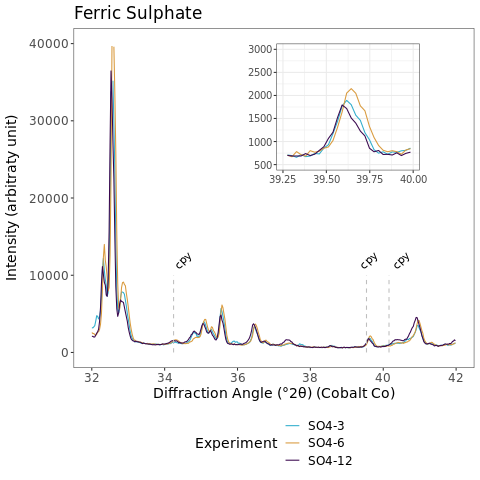

In [435]:
%%R -i xrd_df_melted

library(ggplot2)
library(ggpubr)
library(patchwork)

scaleFUN <- function(x) sprintf("%.0f", x)

x <- c(34.245, 39.54, 40.158)
xend = c(34.245, 39.54,40.158)
y <- c(0, 0, 0)
yend = c(10000, 10000, 10000)
cpy_hkl <- data.frame(x, xend,y, yend)
df <- data.frame(x = c(34.5, 39.6,40.5), y = c(12000, 12000, 12000), label = c('cpy','cpy', 'cpy'))

xmin = 32
xmax = 42
color_vector=c('Cl-3' = '#F13EA1', 'Cl-6' = '#02854F', 'Cl-12' ='#F75151', 'SO4-3'='#2FADCC', 'SO4-6'='#D99A3D', 'SO4-12'='#39074E')
# '#FFFFFF','#003f5c', '#7a5195', '#ef5675', '#ffa600'
xrd_df_melted_to_plot = subset(xrd_df_melted, x <= xmax & x >= xmin)

xrd_df_melted_to_plot$variable = factor(xrd_df_melted_to_plot$variable,  levels=c('Cl-3','Cl-6', 'Cl-12', 'Cl-26', 'SO4-3', 'SO4-6', 'SO4-12','SO4-26'))

xrd_cl = xrd_df_melted_to_plot[xrd_df_melted_to_plot$Oxidant == 'Ferric Chloride',]
xrd_SO4 = xrd_df_melted_to_plot[xrd_df_melted_to_plot$Oxidant == 'Ferric Sulphate',]

xrd_cl_plot = (ggplot(xrd_cl, aes(x = x, y= value, color = factor(variable))) 
   + geom_line(size =0.5)
   # + facet_wrap(~Oxidant)
   + labs(x="Diffraction Angle (\u00B02\u03b8) (Cobalt Co)", y='Intensity (arbitraty unit)', color='Experiment', title = 'Ferric Chloride')
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,2))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(0, 40000),labels=scaleFUN)
   + scale_color_manual(drop=TRUE, values=color_vector, limits = force)
   + geom_text( data = df,aes(x = x, y = y, label = label), color='black', angle = 45) 
   + geom_segment(data = cpy_hkl, aes(x =x,xend =xend, y = y, yend=yend),linetype = 'dashed', color = 'grey')
   # + geom_curve(aes(x = 34.4, y = 2900, xend = 36.8, yend = 23000), arrow = arrow(length = unit(0.03, "npc")), curvature = -0.2, color = 'black', size = 0.25)
#    + annotate("text", x = c(34.5, 40), y = c(12000, 12000), label = c('hola', 'cpy'))
   +guides(color=guide_legend(nrow=3))
   + theme_bw()
   + theme(text = element_text(size = 14), strip.background = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    panel.grid = element_blank(), panel.spacing.y = unit(0, 'null'),legend.key = element_rect(fill = NA),legend.position="bottom",
    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0))) 

)

inset_xrd_Cl = (ggplot(xrd_cl, aes(x = x, y= value, color = factor(variable))) 
   + geom_line(size =0.5)
   + labs(x="", y='', color='Experiment')
   + scale_x_continuous(limits=c(34, 34.5), breaks=seq(0,34.5,0.25))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(500, 3000),labels=scaleFUN)
   + scale_color_manual(drop=TRUE, values=color_vector)
   # + geom_text( data = df,aes(x = x, y = y, label = label), color='black', angle = 45) 
   + geom_segment(data = cpy_hkl, aes(x =x,xend =xend, y = y, yend=yend),linetype = 'dashed', color = 'grey')
#    + annotate("text", x = c(34.5, 40), y = c(12000, 12000), label = c('hola', 'cpy'))
   # +guides(color=guide_legend(nrow=1))
   + theme_bw()
   + theme(plot.background = element_rect(fill = "transparent", color = NA), text = element_text(size = 10), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(0,0,0,0, "cm"), legend.position = "none",
    axis.text = element_text(size  = 10), axis.title.y = element_text(margin = margin(t = 0, r = 0, b = 0, l = 0)))

)

xrd_SO4_plot = (ggplot(xrd_SO4, aes(x = x, y= value, color = factor(variable))) 
   + geom_line(size =0.5)
   # + facet_wrap(~Oxidant)
   + labs(x="Diffraction Angle (\u00B02\u03b8) (Cobalt Co)", y='Intensity (arbitraty unit)', color='Experiment', title = 'Ferric Sulphate')
   + scale_x_continuous(limits=c(xmin, xmax), breaks=seq(0,xmax,2))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(0, 40000),labels=scaleFUN)
   + scale_color_manual(drop=TRUE, values=color_vector , limits = force)
   + geom_text( data = df,aes(x = x, y = y, label = label), color='black', angle = 45) 
   # + geom_curve(aes(x = 39.4, y = 2500, xend = 36.6, yend = 23000), arrow = arrow(length = unit(0.03, "npc")), curvature = -0.5, color = 'black', size = 0.25)
   + geom_segment(data = cpy_hkl, aes(x =x,xend =xend, y = y, yend=yend),linetype = 'dashed', color = 'grey')
#    + annotate("text", x = c(34.5, 40), y = c(12000, 12000), label = c('hola', 'cpy'))
   +guides(color=guide_legend(nrow=3))
   + theme_bw()
   + theme(text = element_text(size = 14), strip.background = element_blank(),
    legend.text=element_text(size=12), plot.margin = margin(.2,.2,.2,.2, "cm"), axis.ticks.x = element_line(),
    panel.grid = element_blank(), panel.spacing.y = unit(0, 'null'),legend.key = element_rect(fill = NA),legend.position="bottom",
    axis.text = element_text(size  = 12), axis.title.y = element_text(margin = margin(t = 0, r = 10, b = 0, l = 0))) 

)

inset_xrd_SO4 = (ggplot(xrd_SO4, aes(x = x, y= value, color = factor(variable))) 
   + geom_line(size =0.5)
   + labs(x="", y='', color='Experiment')
   + scale_x_continuous(limits=c(39.25, 40), breaks=seq(0,40,0.25))
   + scale_y_continuous(breaks = scales::pretty_breaks(5), limits = c(500, 3000),labels=scaleFUN)
   + scale_color_manual(drop=TRUE, values=color_vector)
   # + geom_text( data = df,aes(x = x, y = y, label = label), color='black', angle = 45) 
   + geom_segment(data = cpy_hkl, aes(x =x,xend =xend, y = y, yend=yend),linetype = 'dashed', color = 'grey')
#    + annotate("text", x = c(34.5, 40), y = c(12000, 12000), label = c('hola', 'cpy'))
   # +guides(color=guide_legend(nrow=1))
   + theme_bw()
   + theme(plot.background = element_rect(fill = "transparent", color = NA), text = element_text(size = 10), strip.background = element_blank(), strip.text.y = element_text(size=12, angle=0),
    legend.text=element_text(size=12), plot.margin = margin(0,0,0,0, "cm"), legend.position = "none",
    axis.text = element_text(size  = 10), axis.title.y = element_text(margin = margin(t = 0, r = 0, b = 0, l = 0)))

)

xrd_cl_plot =  xrd_cl_plot + annotation_custom(ggplotGrob(inset_xrd_Cl), xmin = 36, xmax = 41, ymin = 20000, ymax = 40000) 
xrd_SO4_plot =  xrd_SO4_plot + annotation_custom(ggplotGrob(inset_xrd_SO4), xmin = 36, xmax = 41, ymin = 20000, ymax = 40000) 

xrd_df_plot = ggarrange(xrd_cl_plot, xrd_SO4_plot, ncol=1, common.legend=FALSE, legend= 'right', align = 'hv')
ggsave(xrd_df_plot, filename = './output/slices/xrd/XRD_zoom.pdf', height = 8 , width = 8)

xrd_SO4_plot
